### Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import RFE

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Understanding data set

In [3]:
#Checking the number of rows and column of data frame
housing.shape

(1460, 81)

In [4]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
#Checking the data typs of each column and non null count for each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking null value in each column
housing.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [7]:
# Checking % of null value in each column
print("% of null values in each column")
round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False).head(25)

% of null values in each column


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
dtype: float64

## Perfroming EDA

#### Univarita e Analysys :

In [8]:
housing = housing.drop(['Id'],axis=1)
housing_categotial_variable = housing.select_dtypes([np.object])
housing_numerical_variable = housing.select_dtypes([np.int64,np.float64])

In [9]:
housing_numerical_variable.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
housing_numerical_variable = housing_numerical_variable.drop(['MSSubClass','OverallQual','OverallCond'],axis=1)
housing_numerical_variable.shape

(1460, 34)

In [11]:
#housing_categotial_variable = housing_categotial_variable.append(['MSSubClass','OverallQual','OverallQual','YearBuilt','YearBuilt'])
housing_categotial_variable.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

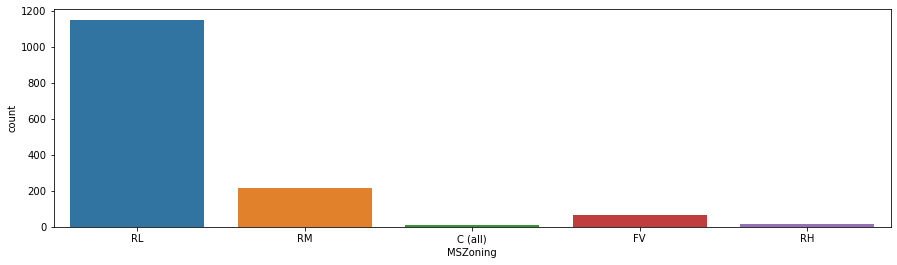

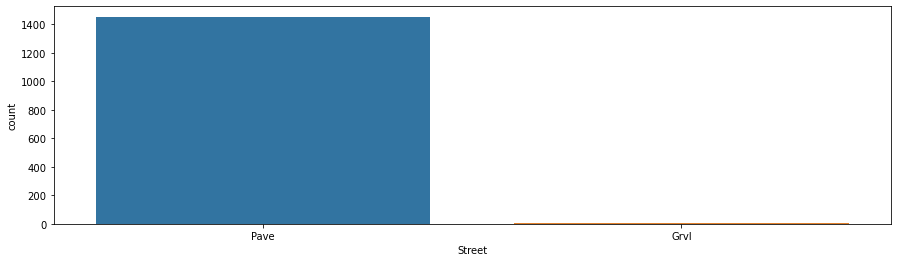

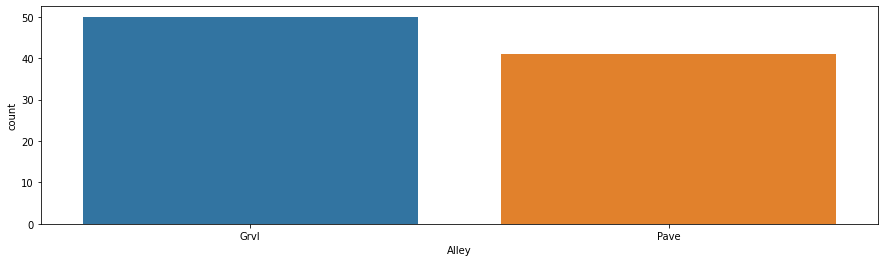

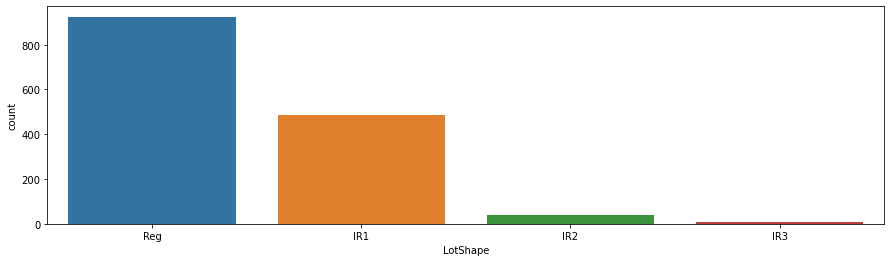

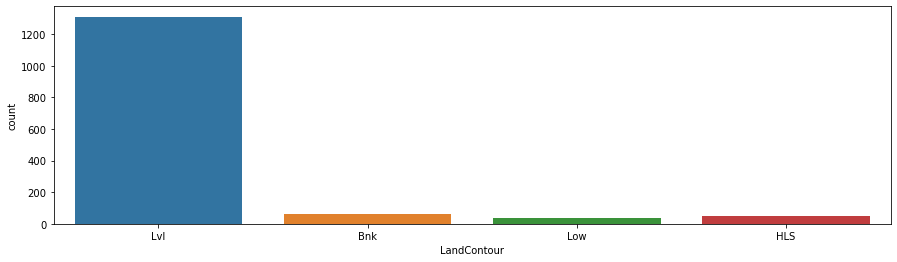

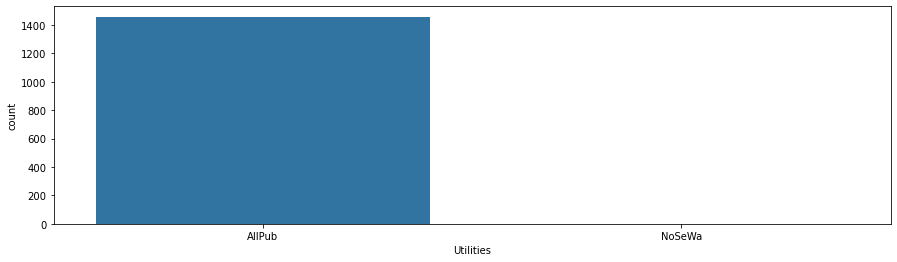

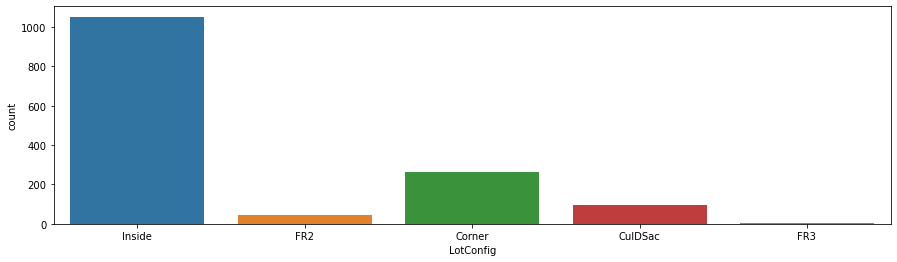

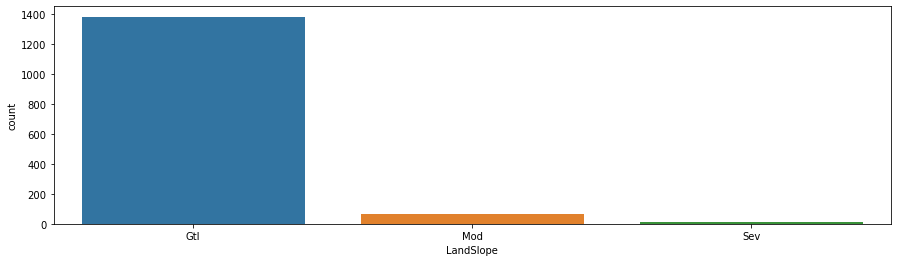

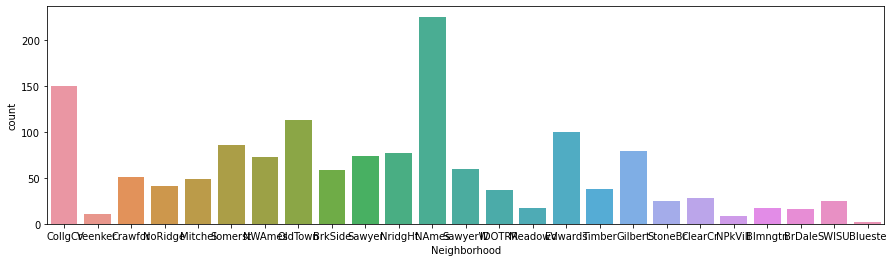

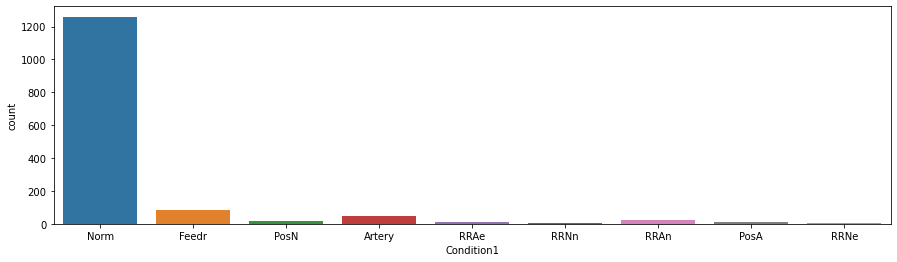

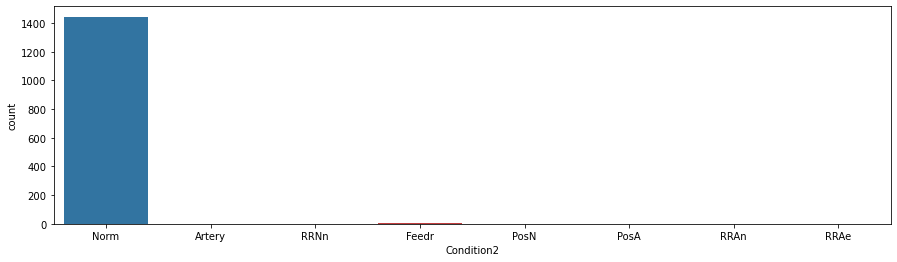

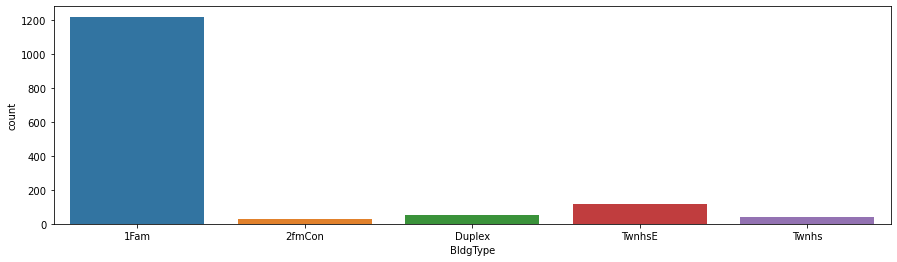

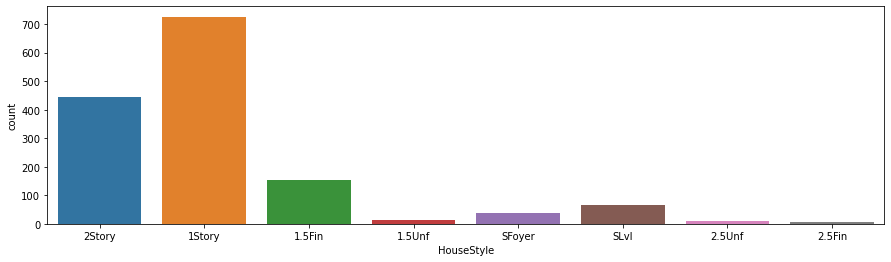

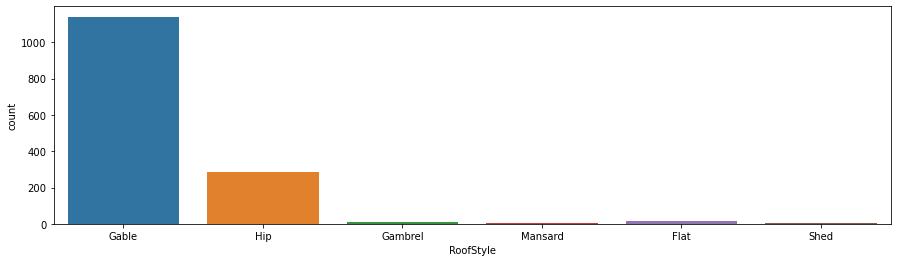

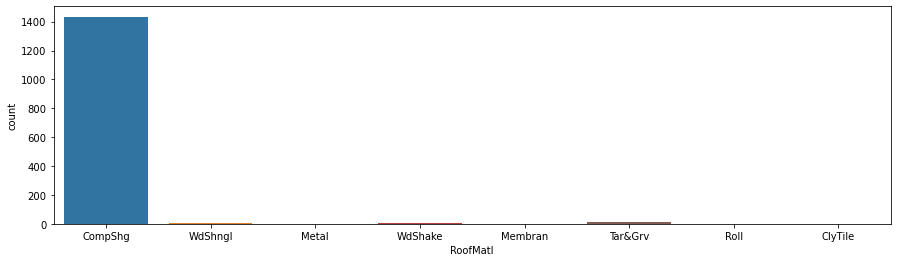

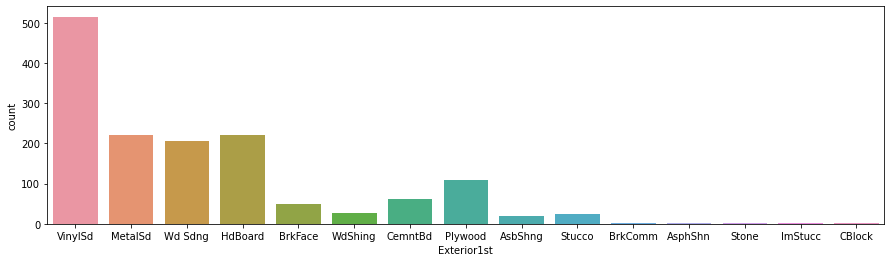

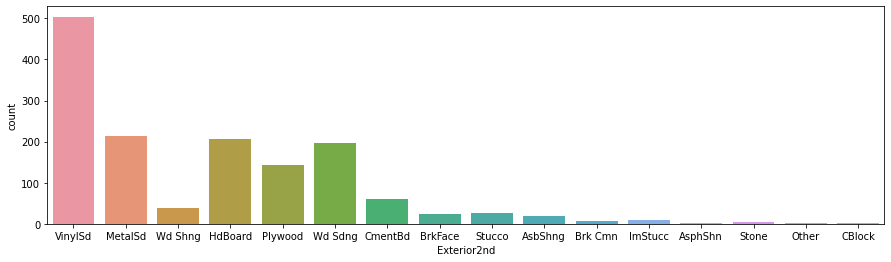

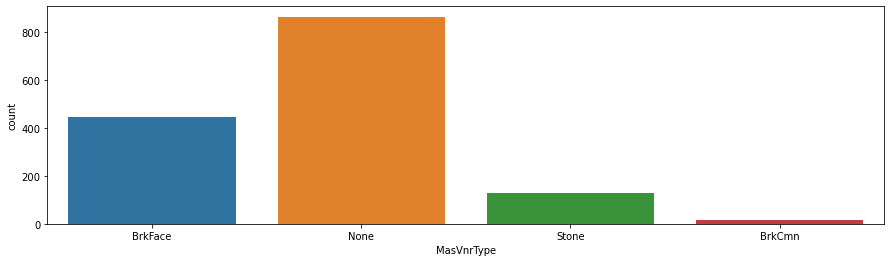

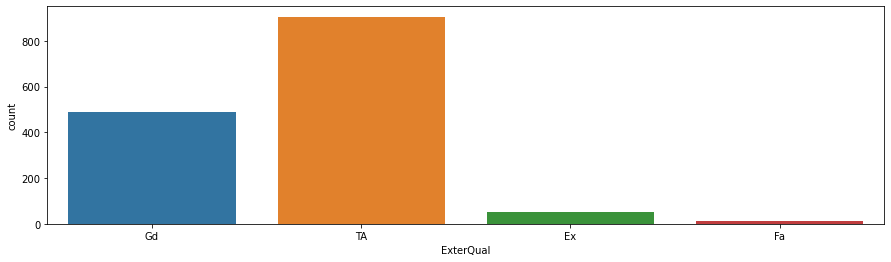

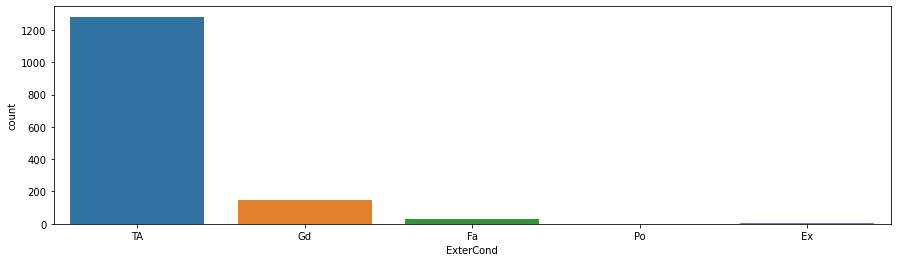

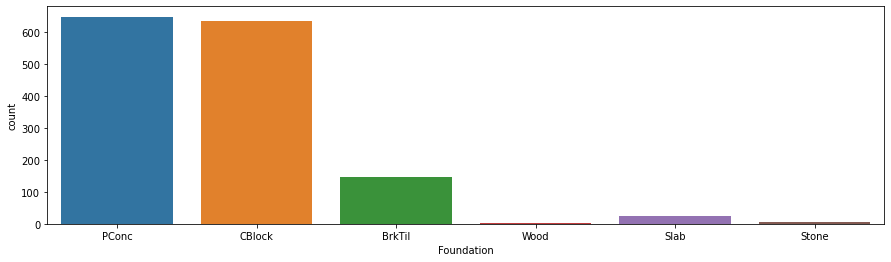

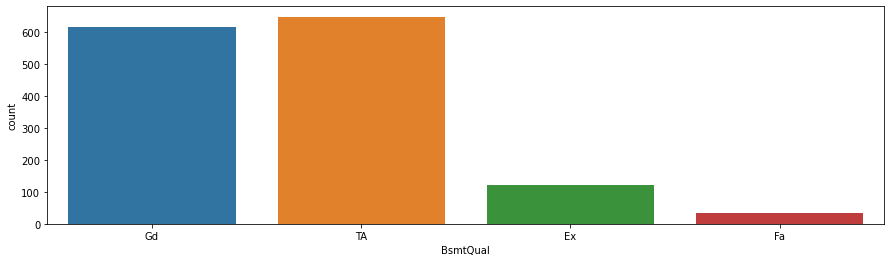

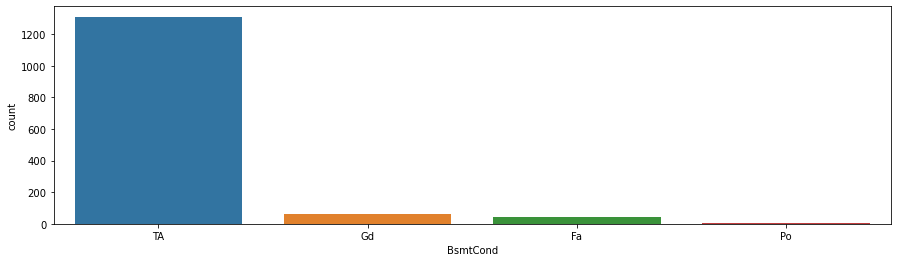

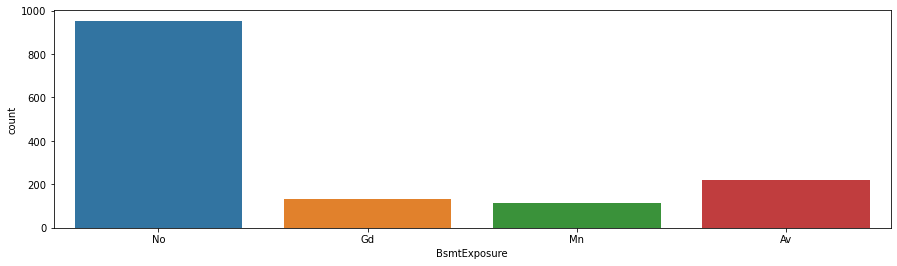

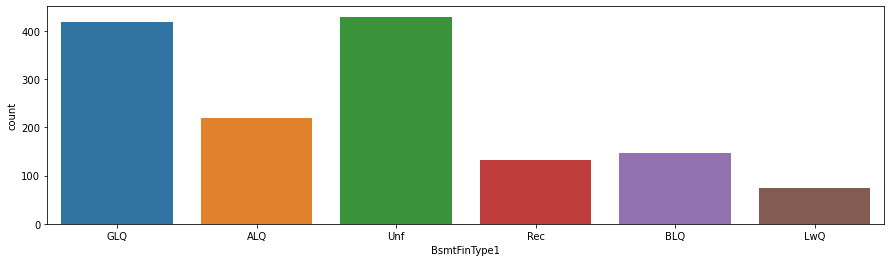

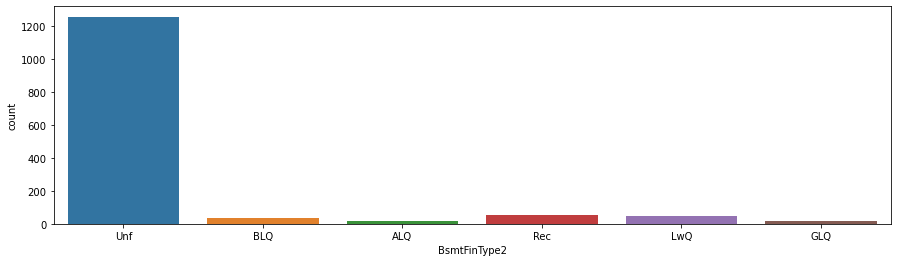

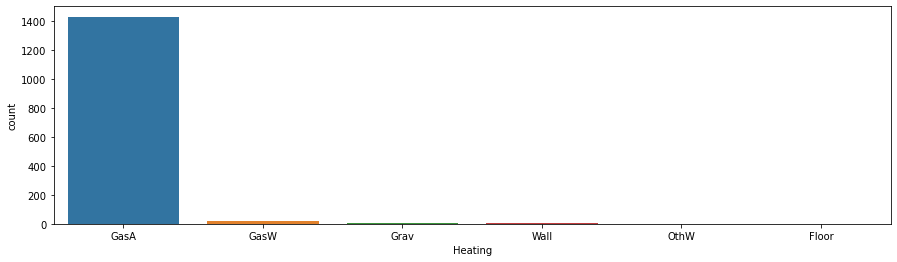

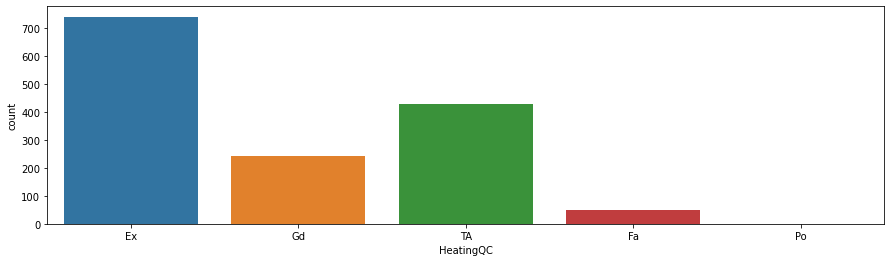

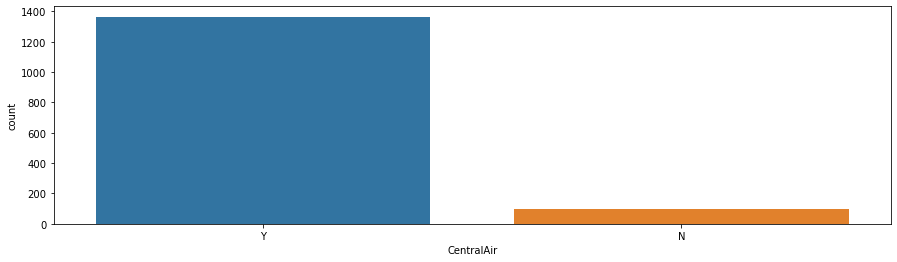

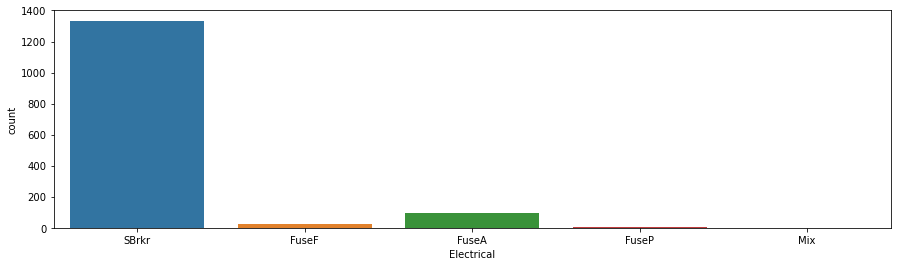

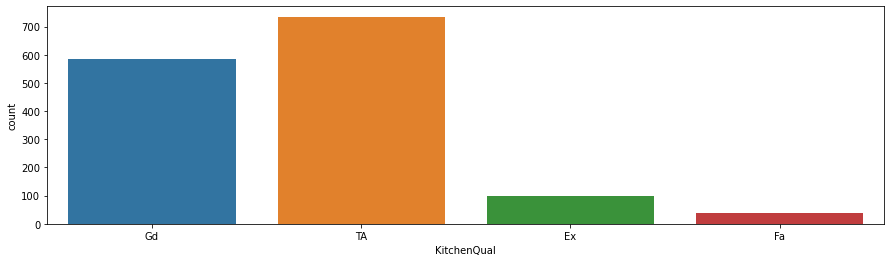

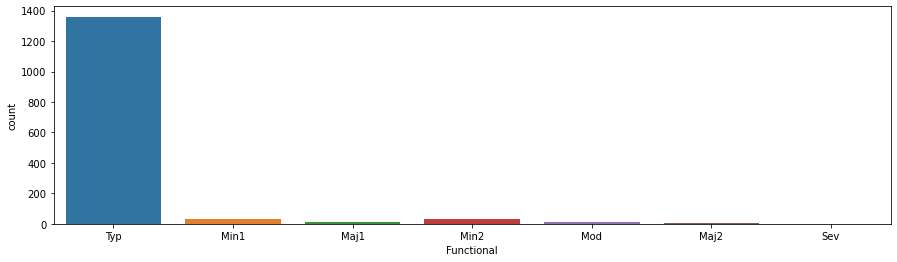

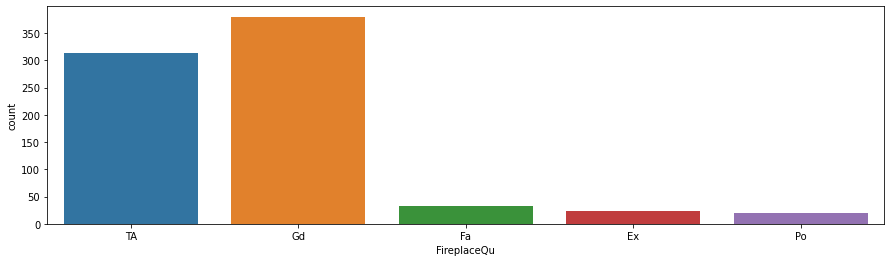

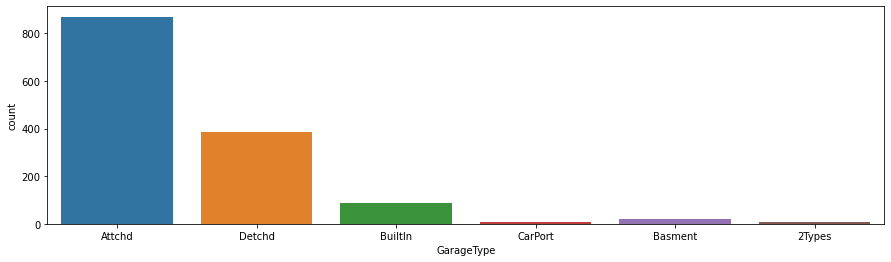

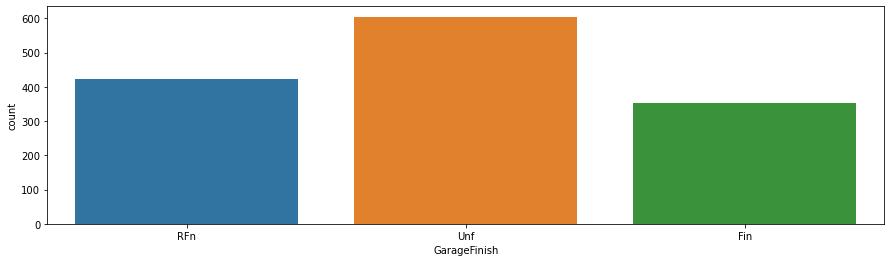

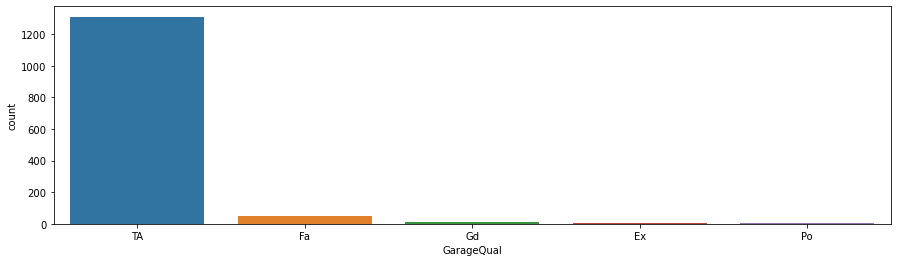

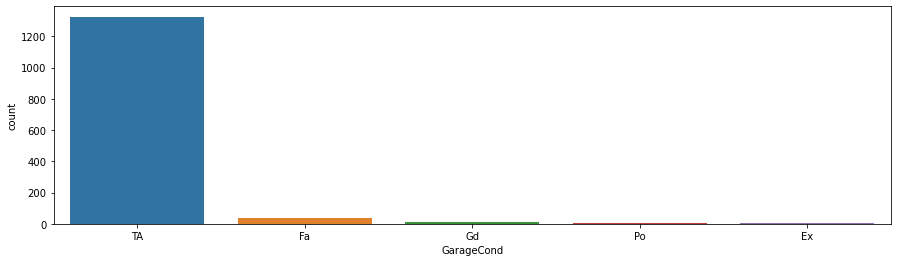

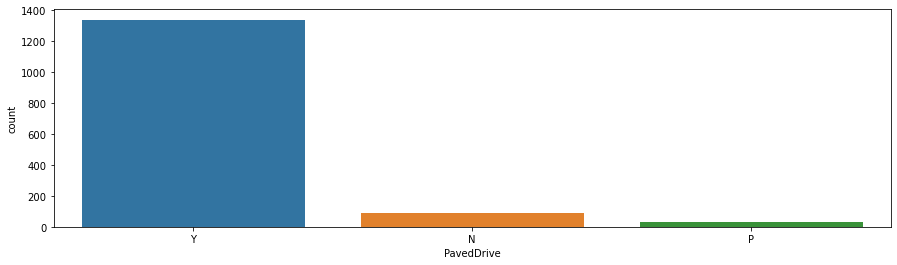

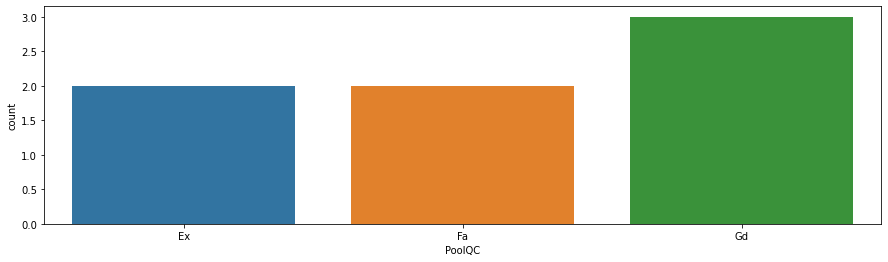

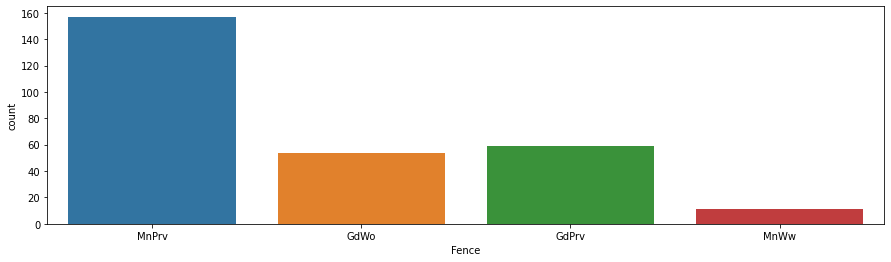

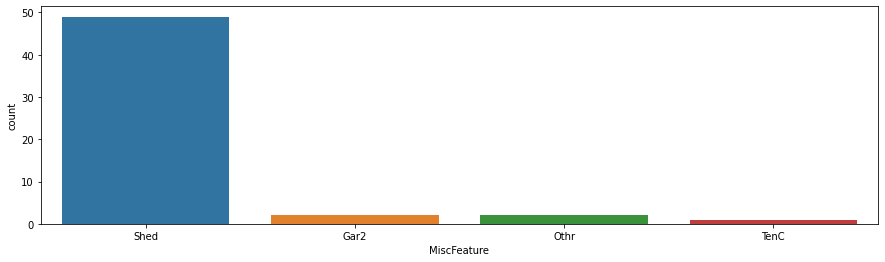

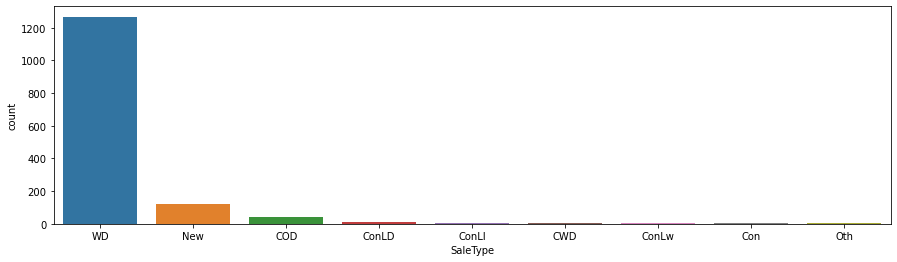

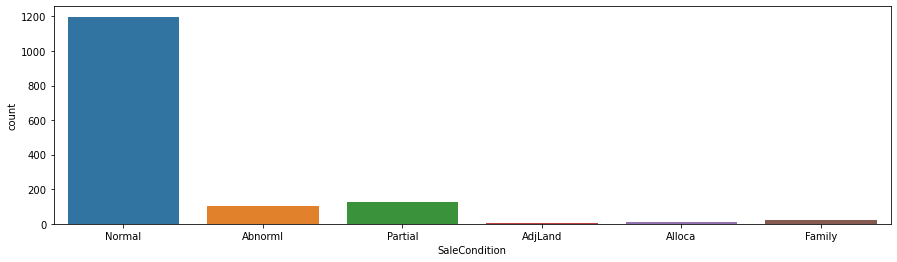

In [12]:
# Visualizing all categorical variable
for i, col in enumerate(housing_categotial_variable.columns):
    plt.figure(i,figsize=(15,4))
    sns.countplot(x=col, data=housing_categotial_variable)

##### Univariate Analysis of categorial features conform folowing points :
- MSZoning feature have almost 85% same value ( RL ). 
- Street feature have "pave" value for all records
- LandContour feature have around 90% value as "Lvl"
- Utilities feature have "AllPub" in all records.
- LandSlope have around 95% values as "Gtl".
- Condition1 have around 90% values as "normal"
- Condition2 have "Normal" in all records.
- BldgType have 90% data as '1Fam'
- RoofMatl have "CompShg" in all records.
- ExterCond have around 90% data as "TA"
- BsmtCond have around 90% data as "TA"
- BsmtFinType2 have around 90% data as "Unf"
- Heating have around 100% data as "GasA'
- CentralAir have around 98% data as "Y".
- Electrical have around 95% data as "SBrkr"
- Functional have around 90% data as "Typ"
- GarageQual have around 98% data as "TA".
- GarageCond have around 98% data as "TA"
- PavedDrive have around 95% data sa "y"
- SaleType have around 90% data as "Normal" 

In [13]:
housing_numerical_variable.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

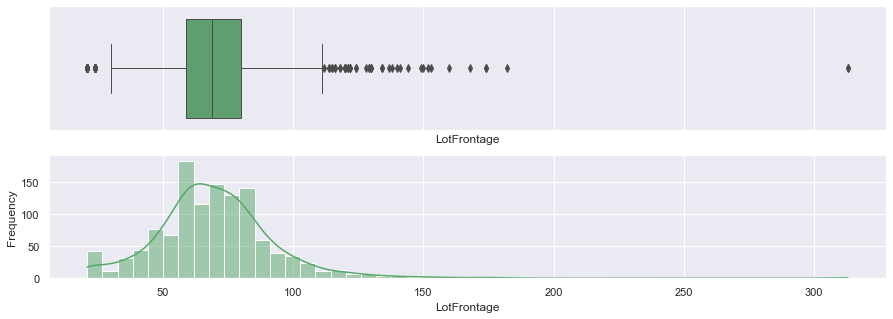

<Figure size 1080x360 with 0 Axes>

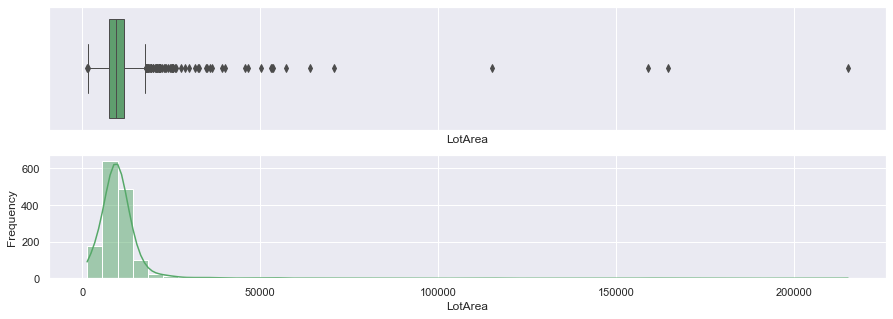

<Figure size 1080x360 with 0 Axes>

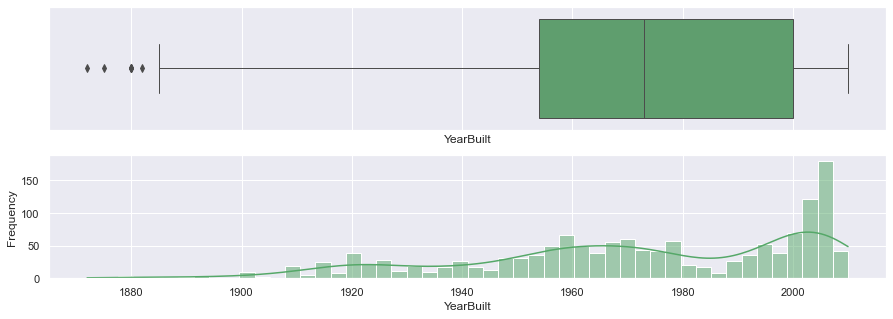

<Figure size 1080x360 with 0 Axes>

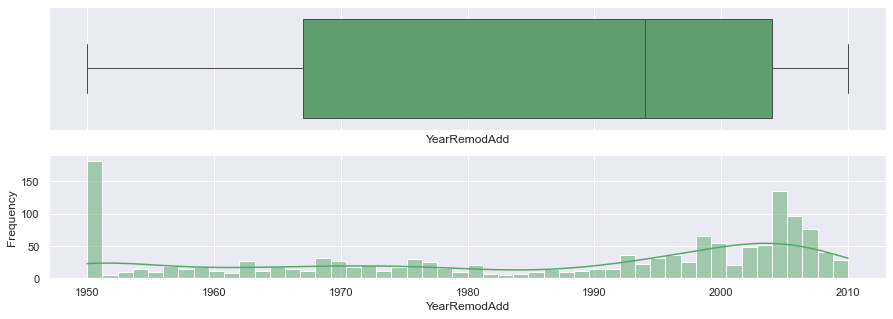

<Figure size 1080x360 with 0 Axes>

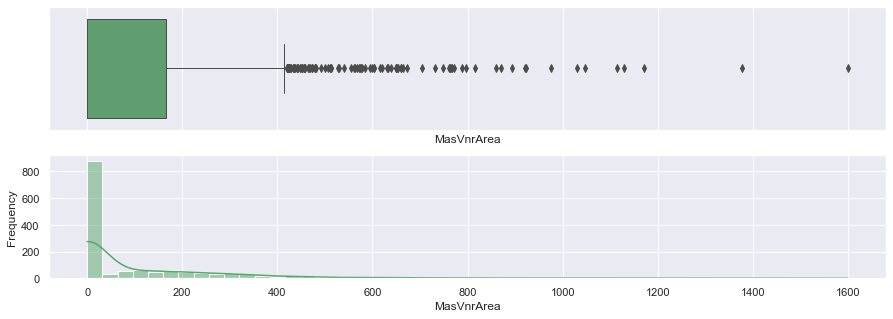

<Figure size 1080x360 with 0 Axes>

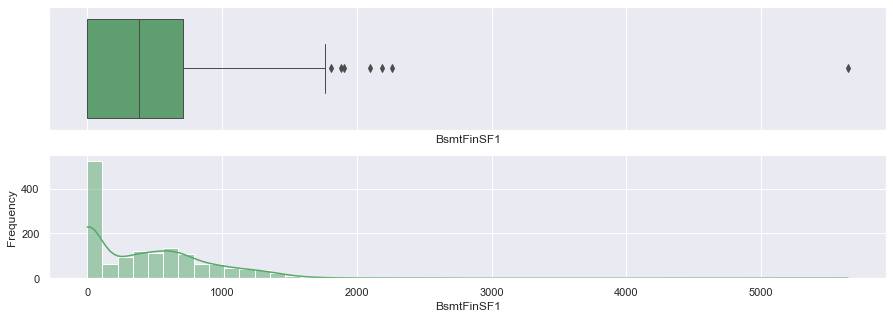

<Figure size 1080x360 with 0 Axes>

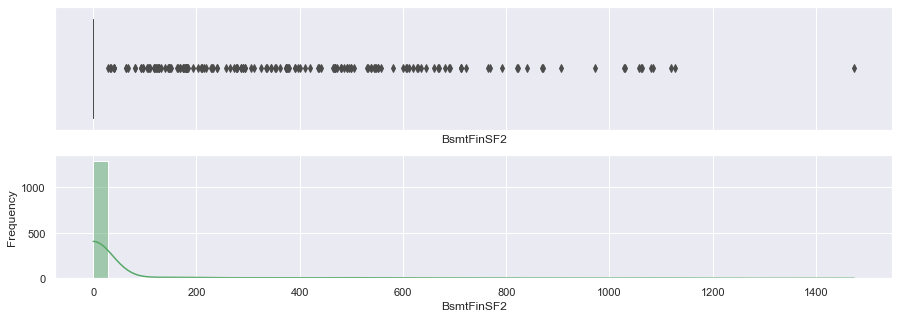

<Figure size 1080x360 with 0 Axes>

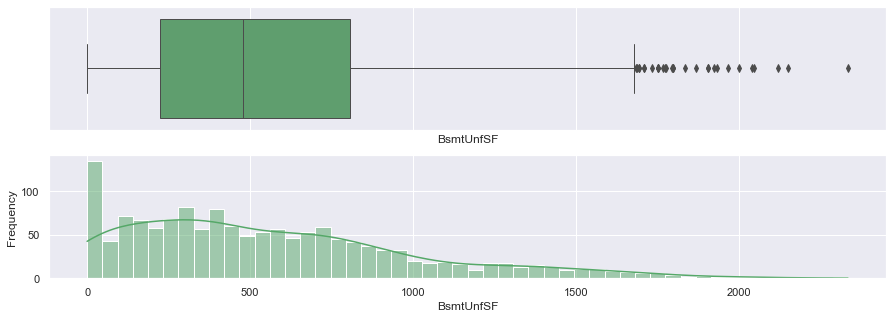

<Figure size 1080x360 with 0 Axes>

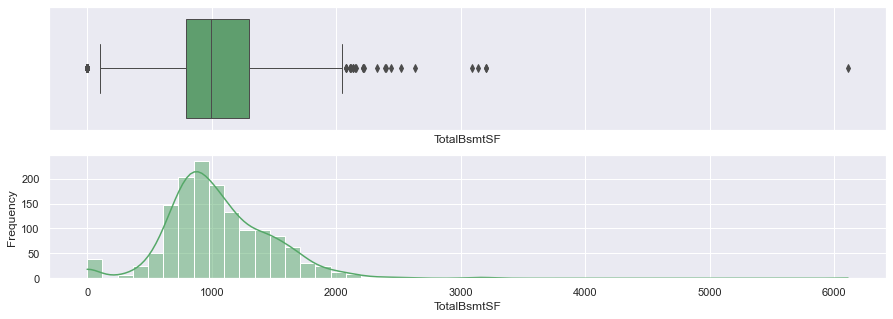

<Figure size 1080x360 with 0 Axes>

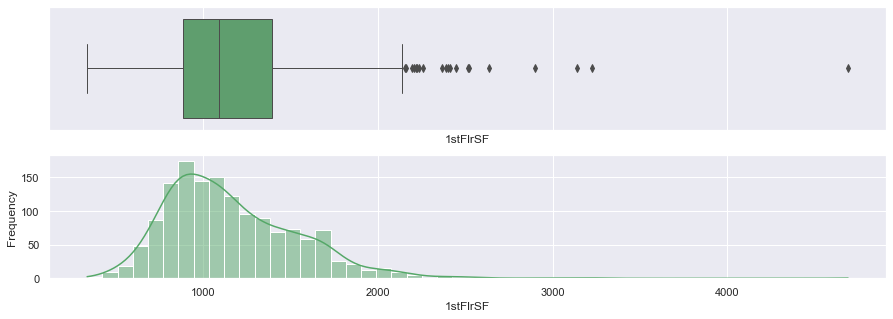

<Figure size 1080x360 with 0 Axes>

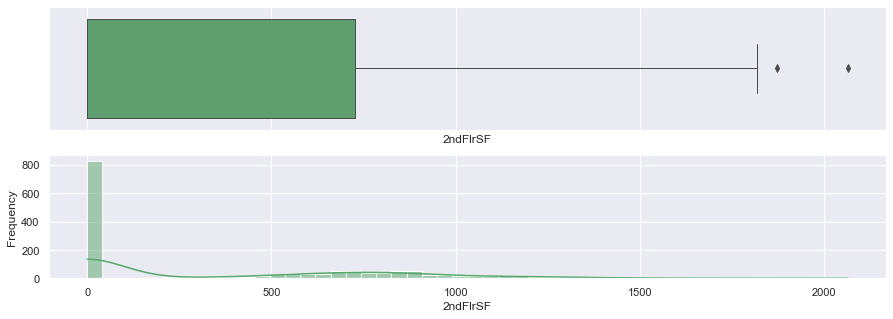

<Figure size 1080x360 with 0 Axes>

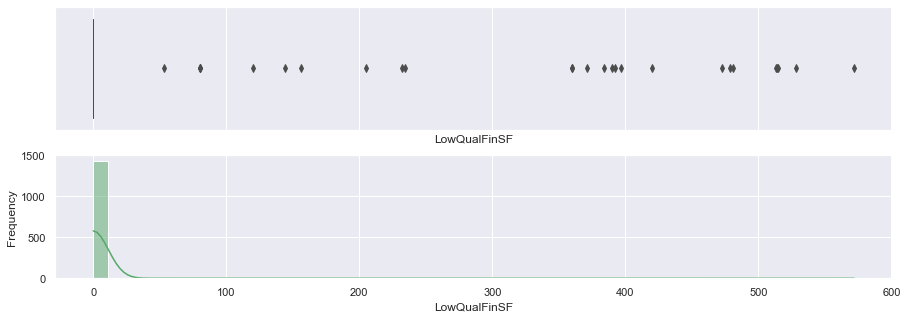

<Figure size 1080x360 with 0 Axes>

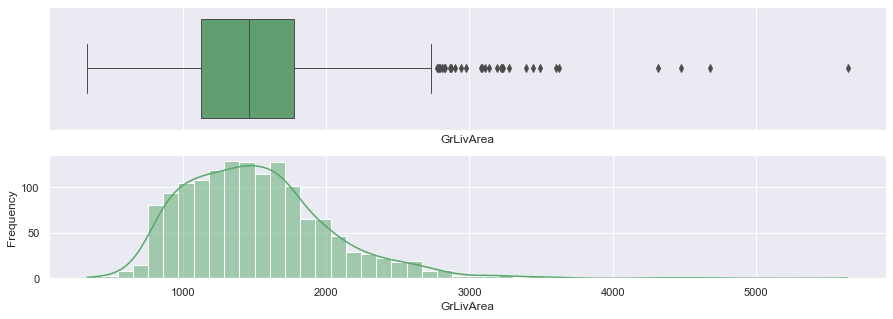

<Figure size 1080x360 with 0 Axes>

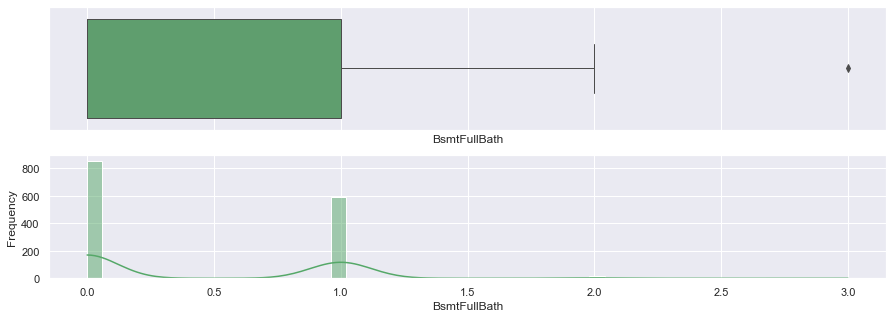

<Figure size 1080x360 with 0 Axes>

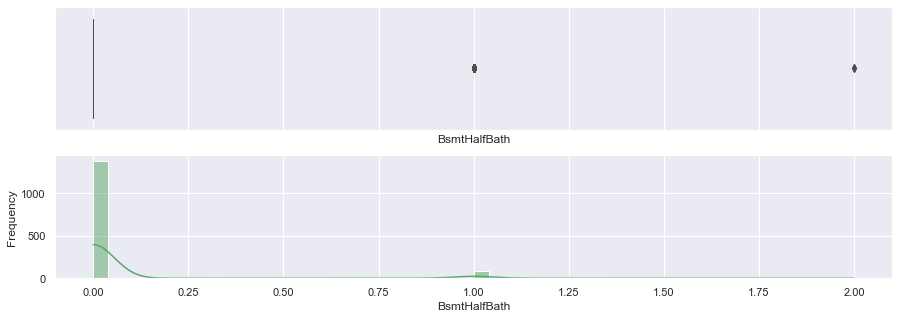

<Figure size 1080x360 with 0 Axes>

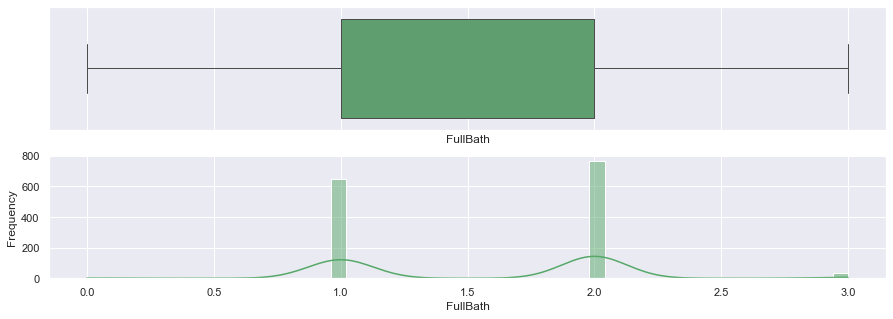

<Figure size 1080x360 with 0 Axes>

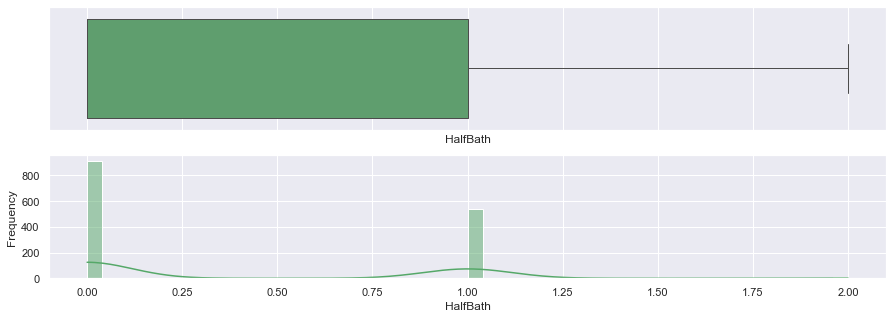

<Figure size 1080x360 with 0 Axes>

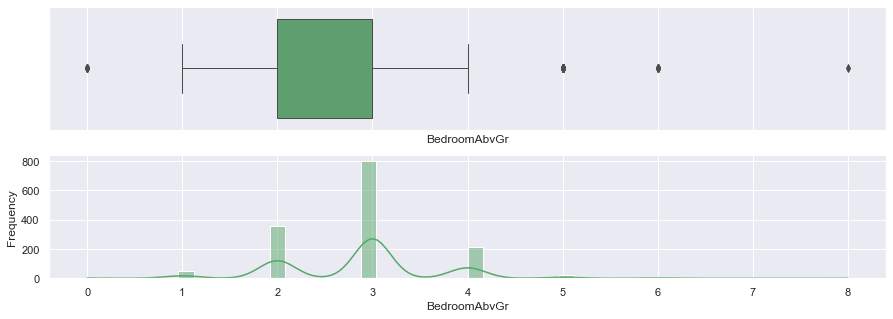

<Figure size 1080x360 with 0 Axes>

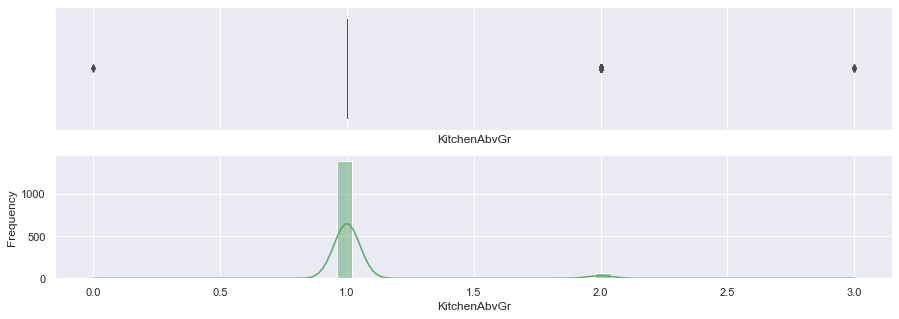

<Figure size 1080x360 with 0 Axes>

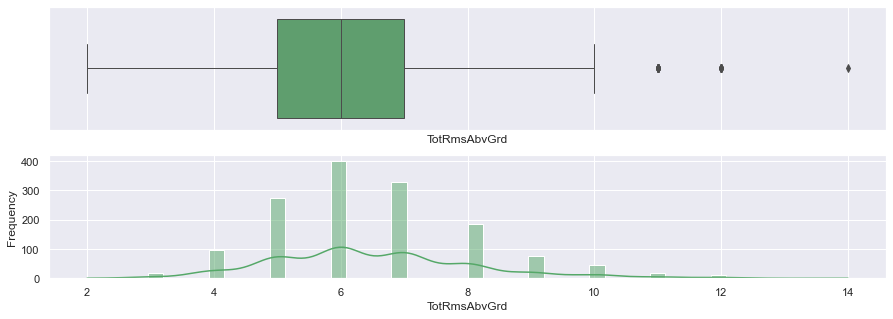

<Figure size 1080x360 with 0 Axes>

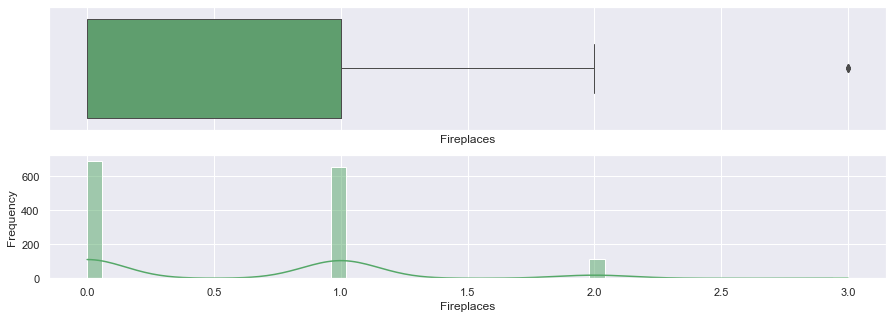

<Figure size 1080x360 with 0 Axes>

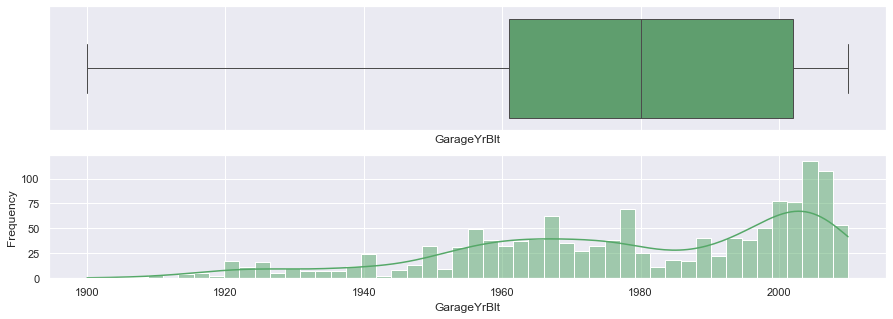

<Figure size 1080x360 with 0 Axes>

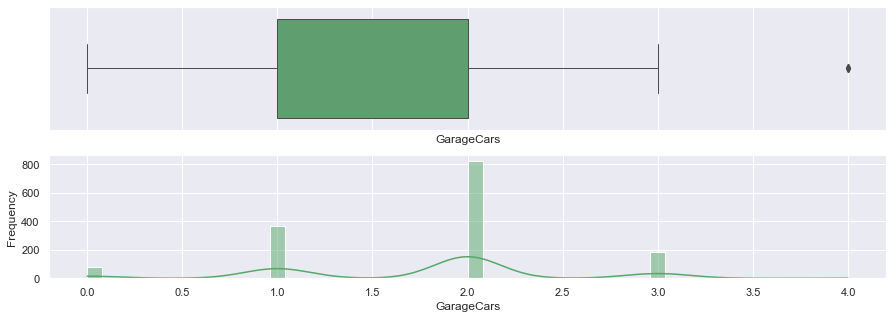

<Figure size 1080x360 with 0 Axes>

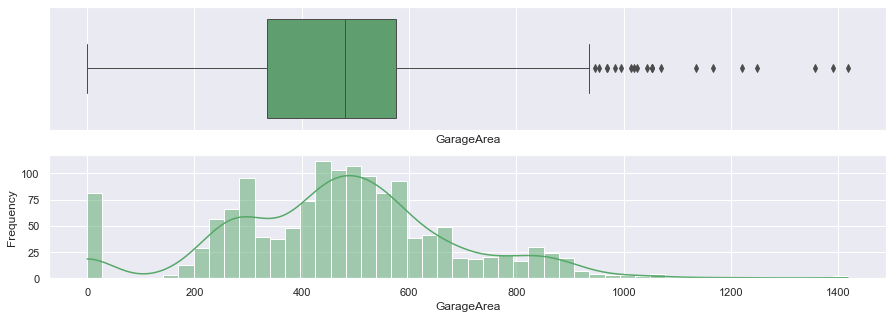

<Figure size 1080x360 with 0 Axes>

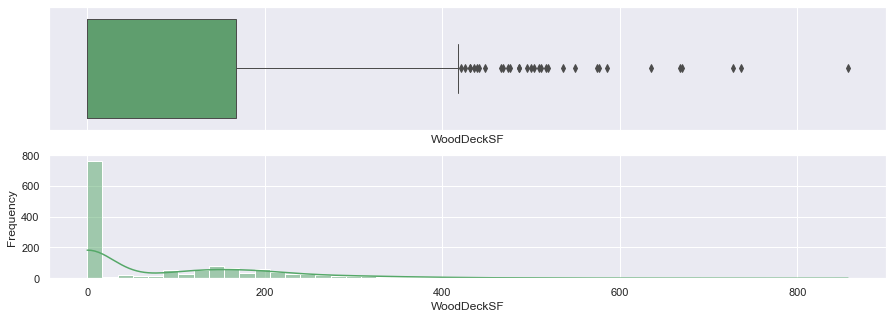

<Figure size 1080x360 with 0 Axes>

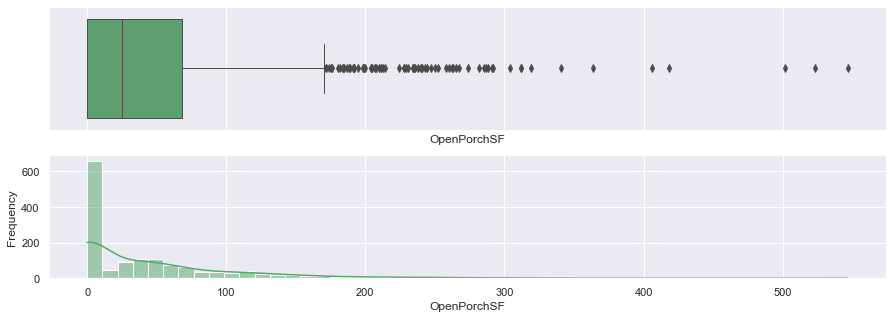

<Figure size 1080x360 with 0 Axes>

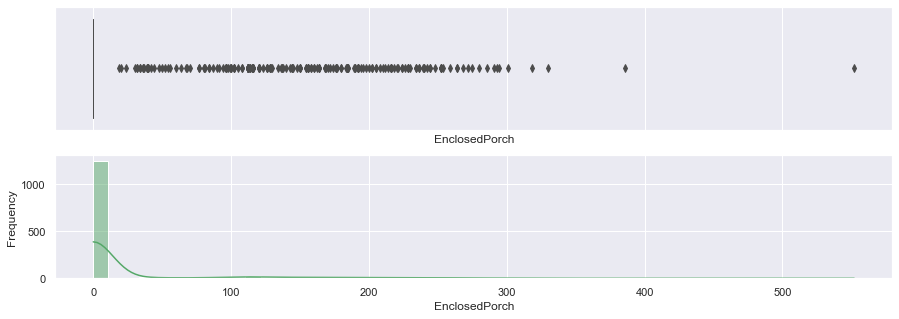

<Figure size 1080x360 with 0 Axes>

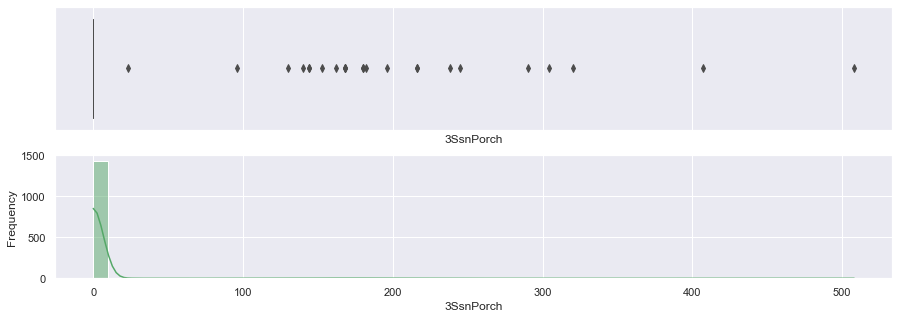

<Figure size 1080x360 with 0 Axes>

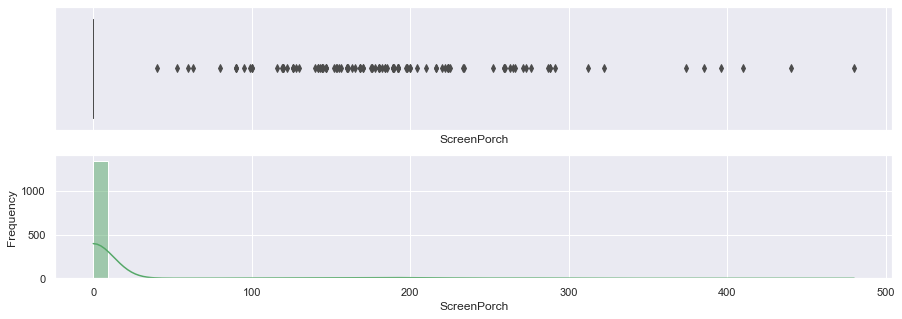

<Figure size 1080x360 with 0 Axes>

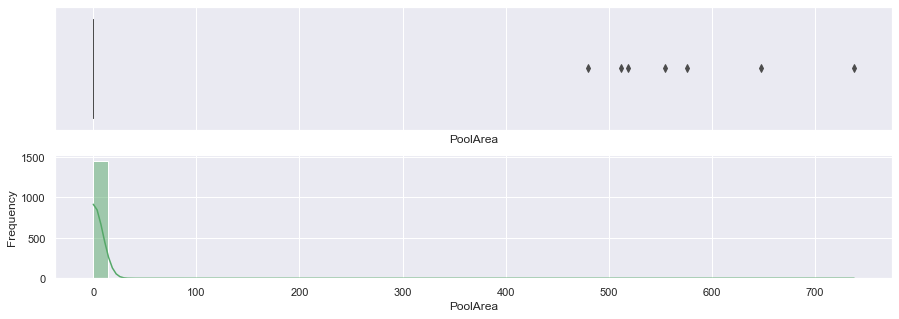

<Figure size 1080x360 with 0 Axes>

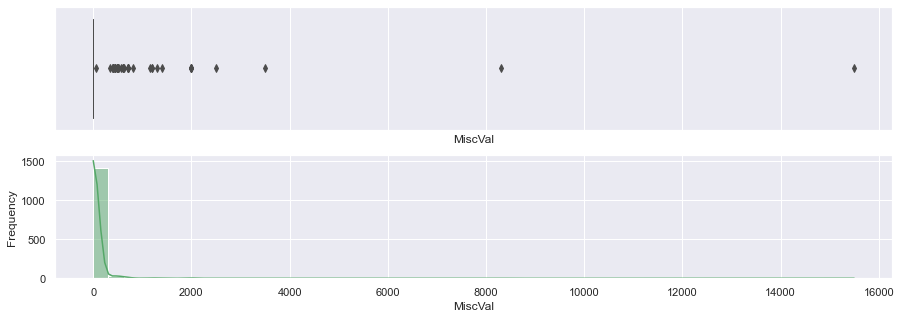

<Figure size 1080x360 with 0 Axes>

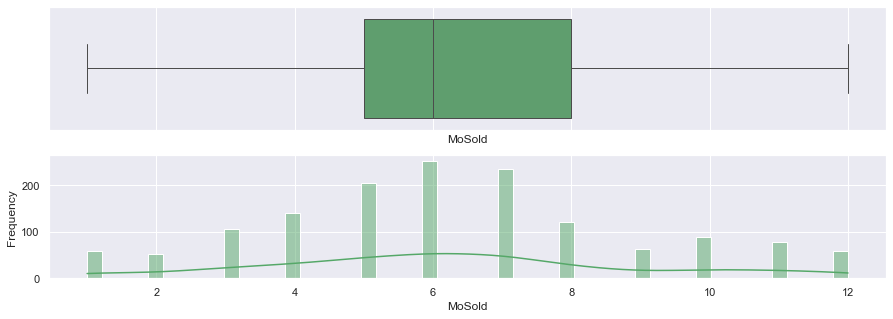

<Figure size 1080x360 with 0 Axes>

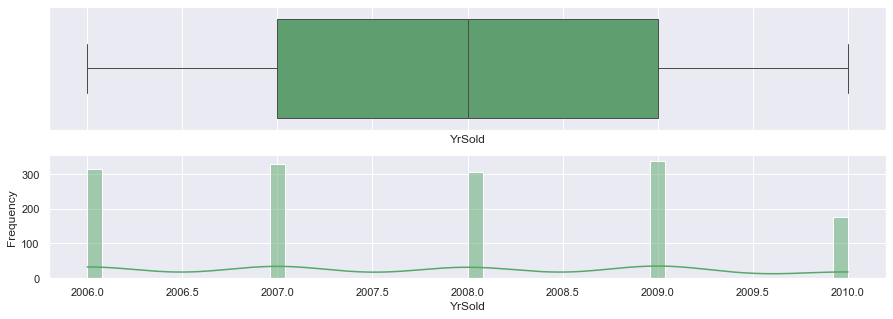

<Figure size 1080x360 with 0 Axes>

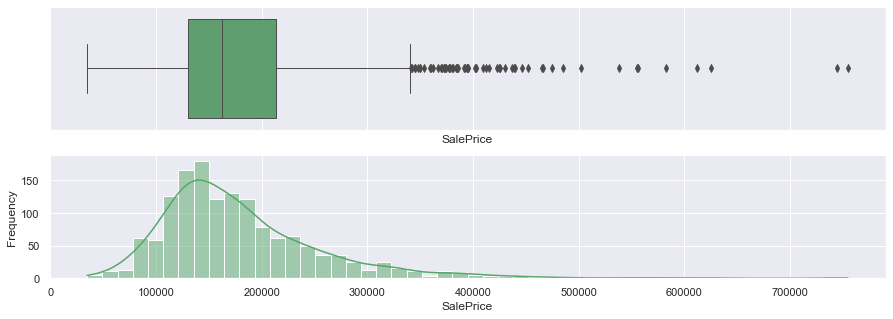

In [14]:
#Visualizing numerical variables : I will drop Id file once I am done with EDA
for i in housing_numerical_variable.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(15, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(housing_numerical_variable[i], ax=ax_box , linewidth= 1.0,color="g")
    sns.histplot(housing_numerical_variable[i], ax=ax_hist , bins = 50,kde=True,color="g")
    plt.show()
    

##### Univariate Analysis of continuious  variable conform folowing points :
- Lots of variable has outliers 
- BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch,3SsnPorch, ScreenPorch, PoolArea, MiscVal, have lots of value as 0. 

### Bivariate analysis
##### -- Numeric variables

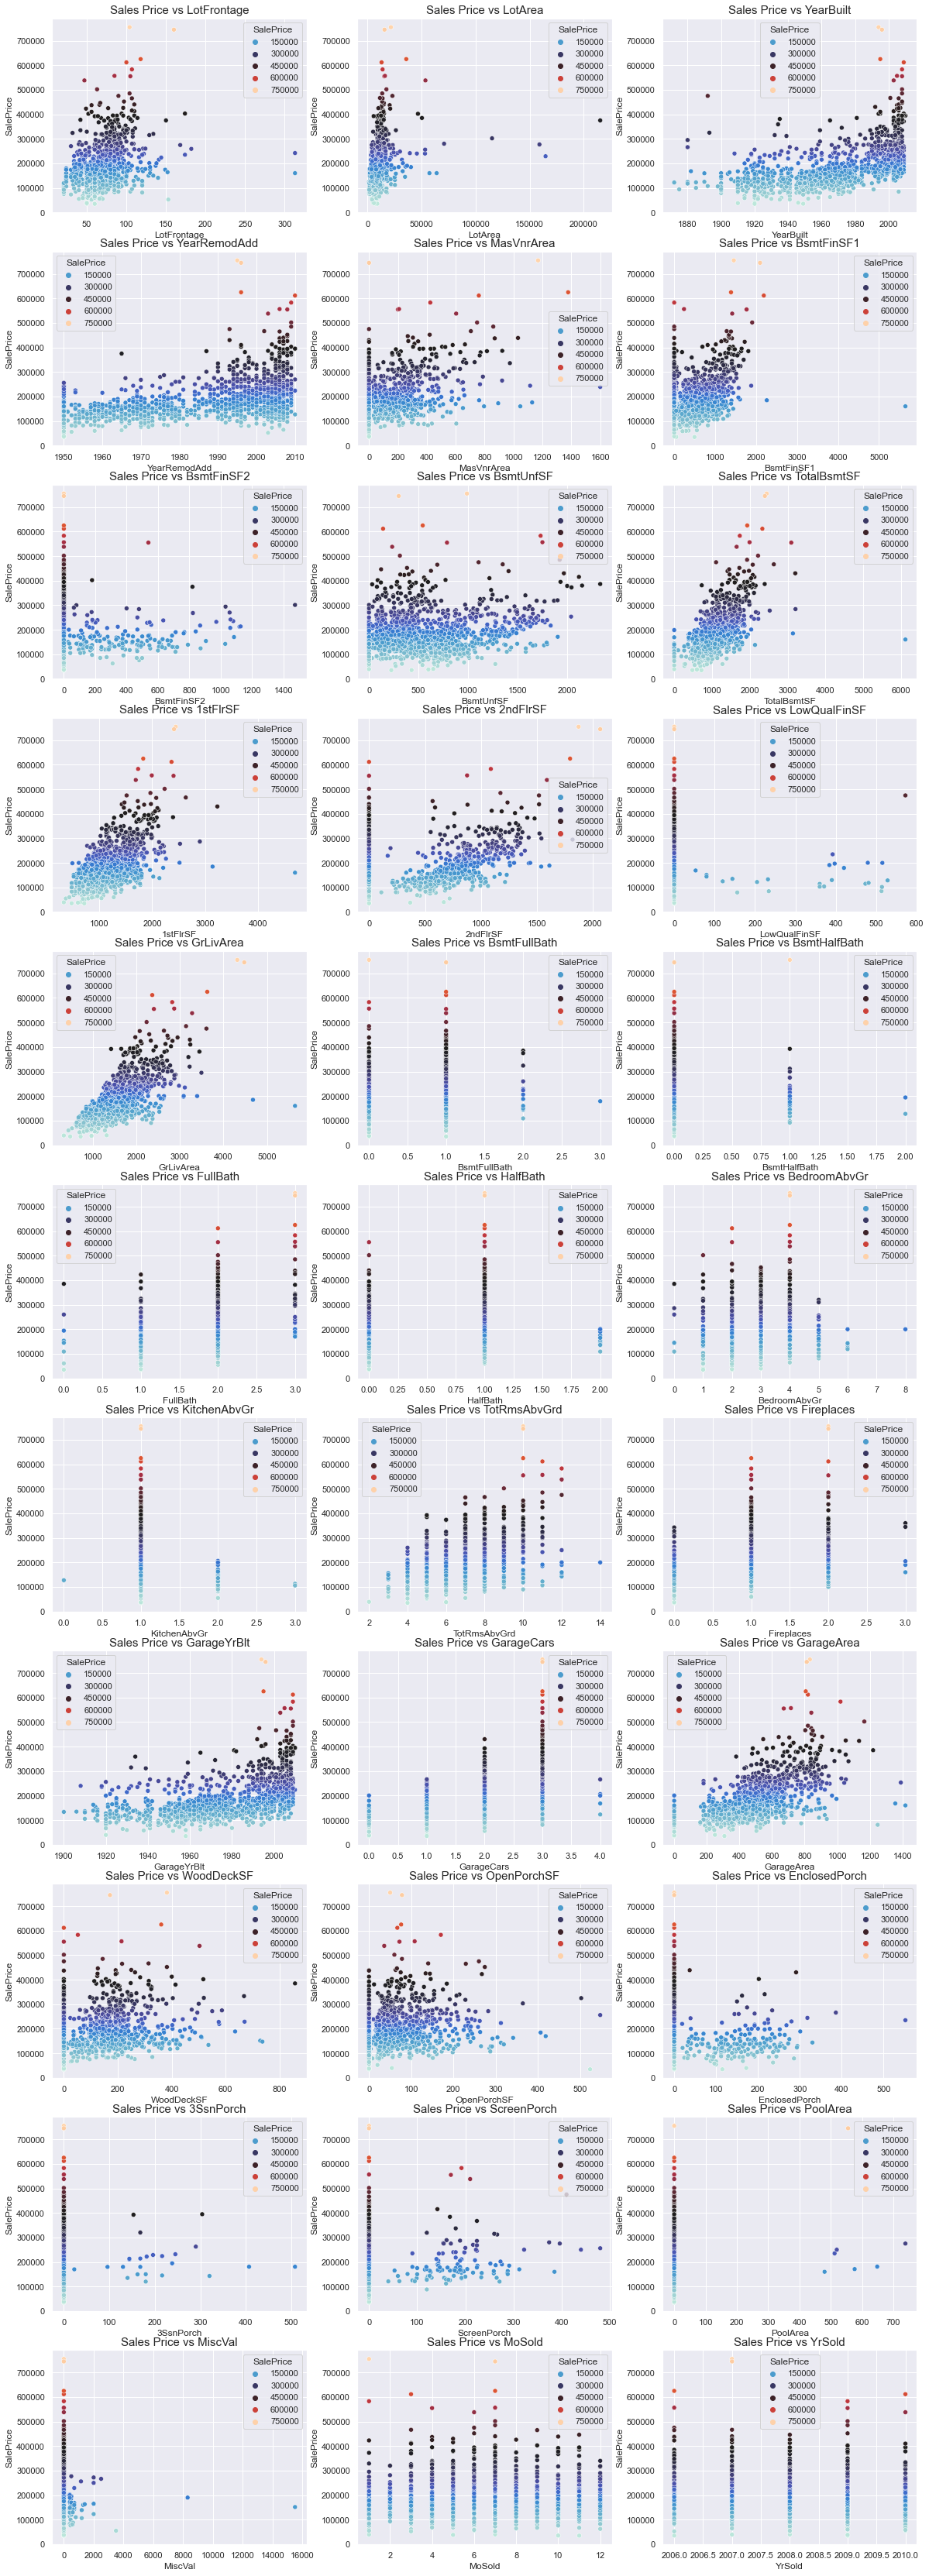

In [15]:
#Visualing the relationship sales price with predictor continuious/numerical varianle
fig,axs= plt.subplots(11,3,figsize=(20,60))
for feature,ax in zip(housing_numerical_variable.columns,axs.flatten()):
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice',data=housing_numerical_variable,ax=ax,palette='icefire')
    plt.xlabel(feature,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('Sales Price'+' vs '+str(feature),fontsize=15)

#### Observation : 
- Overall condition "Avarage" properties having comparitavively higher price.
- Newer properties have higher price.
- Newly renovatyed properties have higher price.
- Properties having newly build gurage have higher price.



#### - - Categorical Variables

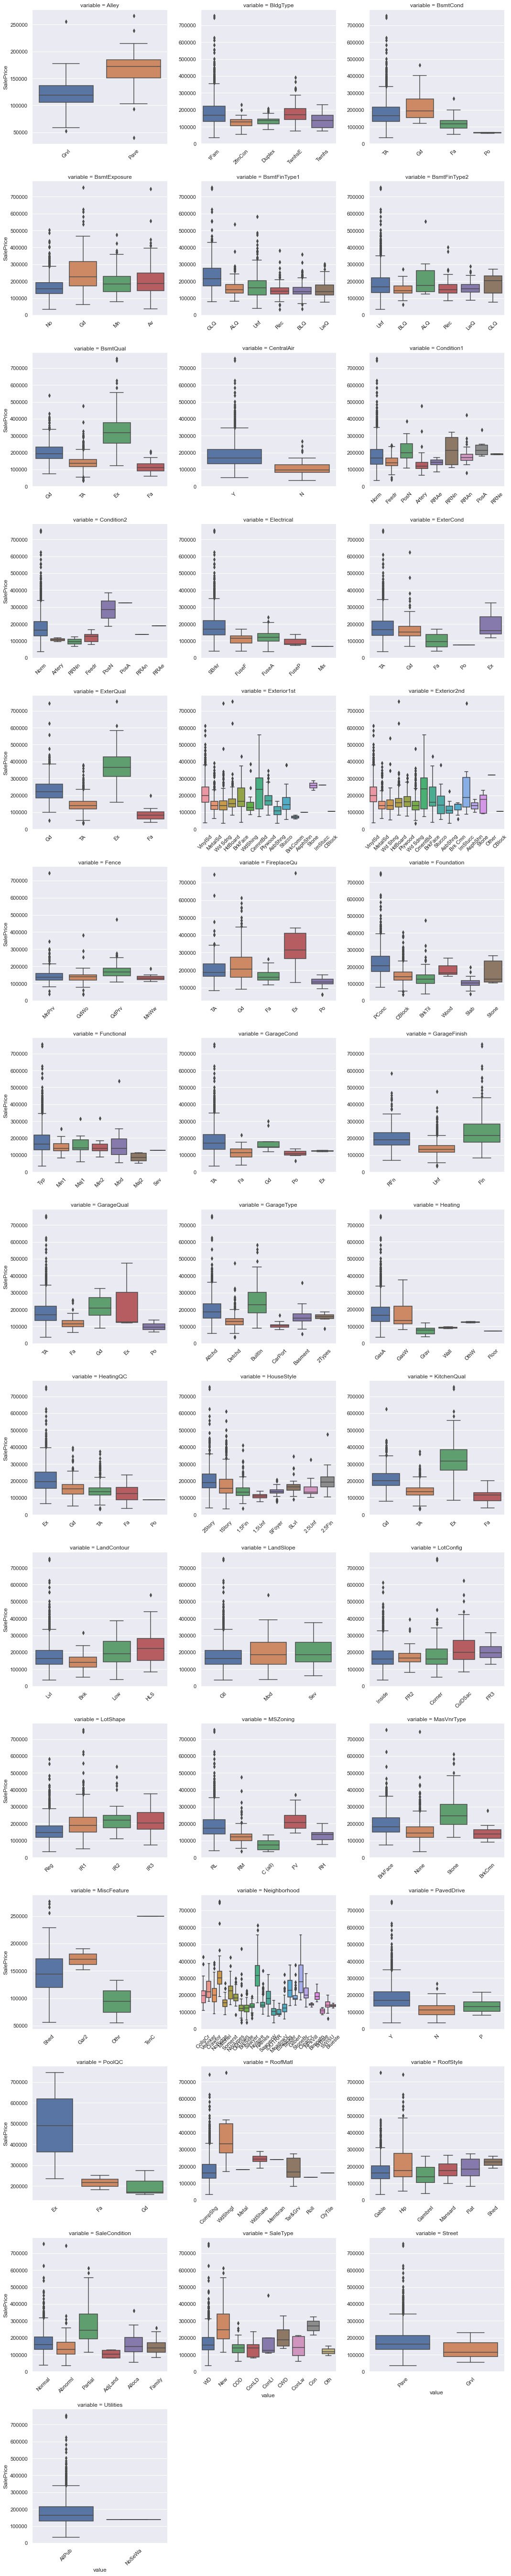

In [16]:
# Studing Sale Price with categorical variables
def boxplotUsingFacetGrid(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=45)
    
unpivoted_dataframe = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(housing_categotial_variable.columns))
facetGrid = sns.FacetGrid(unpivoted_dataframe, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
facetGrid.map(boxplotUsingFacetGrid, "value", "SalePrice")


#### Observations : 
- Paved Alley properties have higher price
- Properties having excellant evaluated the height of the basement have higher price
- Properties with central air conditioning have higher price.
- properties with proximities to  positive off-site feature--park, greenbelt, etc. have higher price.
- Properties with excellant quality of the material on the exterior have higher price
- Properties with excellant fireplace quality have higher price
- Properties with excellant kitchen quality have higher price
- Properties with second gurage or Shed (over 100 SF) have higher price.
- Properties with excellant poot quality have very higher price.

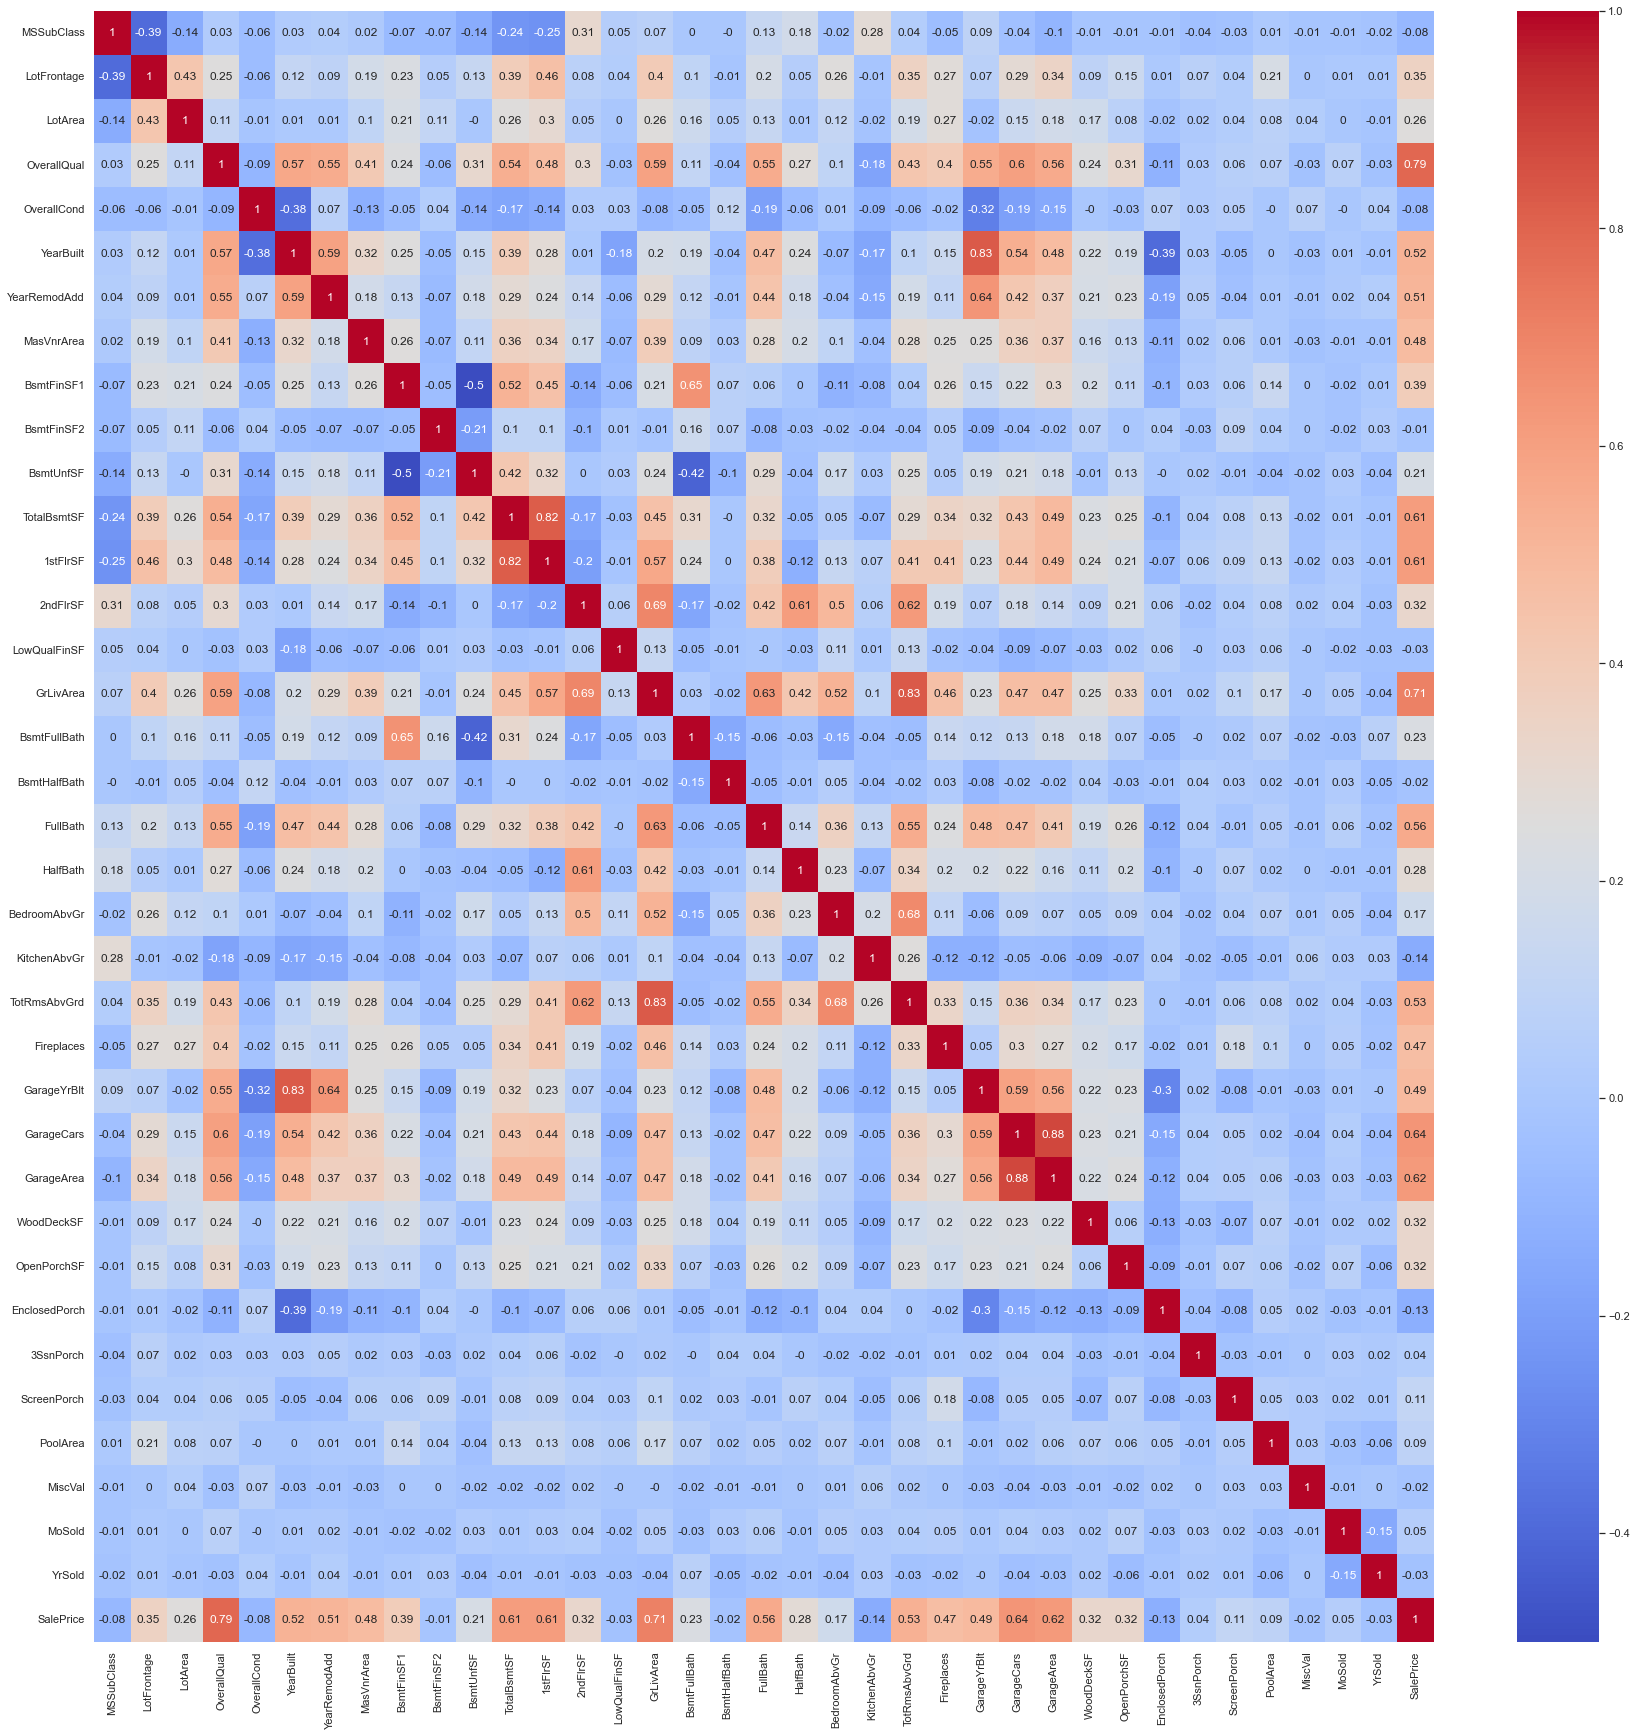

In [17]:
#Heatmap 
plt.figure(figsize=(30,30))
sns.heatmap(round(housing.corr(),2), annot = True, cmap='coolwarm')
plt.show()

#### From above heat map we can see some highly corelation between feature variables.

## Data Preparation
- We dropped ID columkn earlier as we ID do not contribute anything to sale Price.
- We have some year column which give us a good intution but I would loke to derived the age from year
- We have few Categorical variable which is of data type integer. Those need to transform to String type.
- Dropping some unnecessary columns which do not contribute to SalesPrice variable due to more than 95%of same value
- Missing value imputation
- Dummy variabke creation

In [18]:
# Derived variables
housing['age_of_property'] = housing['YrSold'] - housing['YearBuilt']
housing['age_remodel'] = housing['YrSold'] - housing['YearRemodAdd']
housing['age_of_gurage'] = housing['YrSold'] - housing['GarageYrBlt']

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Alley            91 non-null     object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   LotConfig        1460 non-null   object 
 10  LandSlope        1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition1       1460 non-null   object 
 13  Condition2       1460 non-null   object 
 14  BldgType         1460 non-null   object 
 15  HouseStyle       1460 non-null   object 
 16  OverallQual      1460 non-null   int64  
 17  OverallCond   

In [20]:
# Converting data types ( Should we convert year to string. It will give lots of column in dummy creation)
housing[['MSSubClass']] = housing[['MSSubClass']].astype(str)
#housing[['YearBuilt']] = housing[['YearBuilt']].astype(str)
#housing[['YearRemodAdd']] = housing[['YearRemodAdd']].astype(str)
#housing[['GarageYrBlt']] = housing[['GarageYrBlt']].astype(str)
#housing[['MoSold']] = housing[['MoSold']].astype(str)
#housing[['YrSold']] = housing[['YrSold']].astype(str)

In [21]:
# Dropping some unnecessary columns. From univariate analysis , we found few column as shown below
# have 98% same value. So these variable will not contribute to target variable.

In [22]:
housing.shape

(1460, 83)

In [23]:
# Routine to find column having 95% same value
def redundantColumnns(housing):
    columns = []
    for column in housing.columns:
        counts = housing[column].value_counts()
        maximum_occurance = counts.iloc[0]
        if maximum_occurance/len(housing) * 100 > 95 :
            columns.append(column)
    columns = list(columns)
    return columns

In [24]:
feature_to_be_removed = redundantColumnns(housing)
feature_to_be_removed

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [25]:
housing = housing.drop(feature_to_be_removed, axis=1)

In [26]:
housing.shape

(1460, 73)

In [27]:
# Missing value inputation
print("% of null values in each column")
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ] )

% of null values in each column
PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
age_of_gurage     5.55
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
dtype: float64


In [28]:
# Inputting missing value of categorical variable according to data defination
housing['PoolQC'] = housing['PoolQC'].fillna('No Pool')
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
housing['Alley'] = housing['Alley'].fillna('No alley access')
housing['Fence'] = housing['Fence'].fillna('No Fence')
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No Fireplace')
housing['GarageType'] = housing['GarageType'].fillna('No Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No Garage')
housing['GarageCond'] = housing['GarageCond'].fillna('No Garage')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No Basement')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No Basement')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No Basement')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
#housing['MasVnrArea'] = housing['MasVnrArea'].fillna('No Fence')
#housing['LotFrontage'] = housing['LotFrontage'].fillna('No Fence')
#housing['age_of_gurage'] = housing['age_of_gurage'].fillna('No Fence')

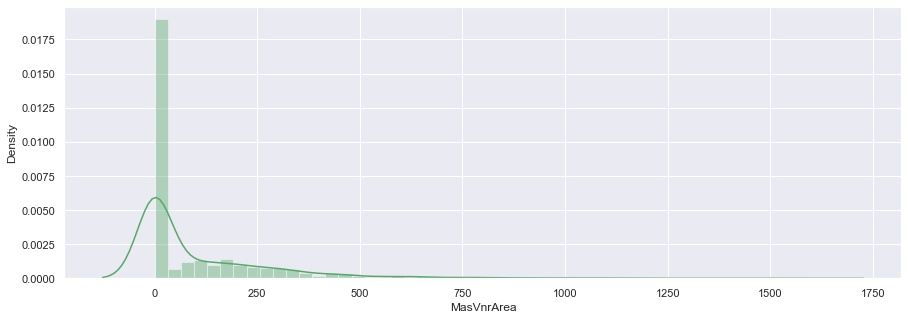

In [29]:
#Inputing missing values for numeric variable
sns.distplot(housing.MasVnrArea,bins=50,color="g")
plt.show()

In [30]:
print("Mean: ", housing.MasVnrArea.mean())
print("Median: ", housing.MasVnrArea.median())
print("Mode: ", housing.MasVnrArea.mode().values[0])

Mean:  103.68526170798899
Median:  0.0
Mode:  0.0


In [31]:
# Imputing MasVnrArea with median
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing.MasVnrArea.median())

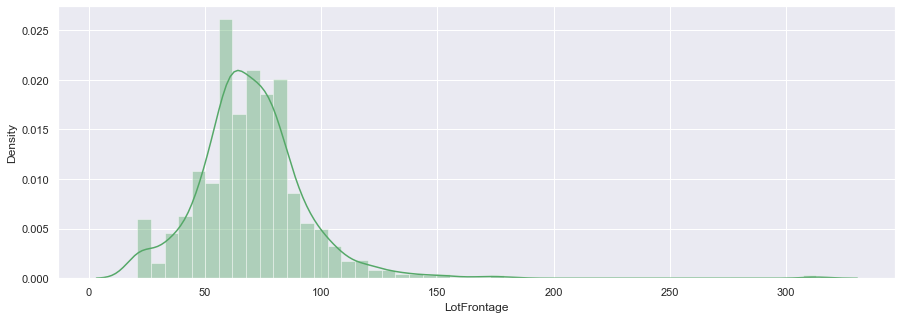

In [32]:
sns.distplot(housing.LotFrontage,bins=50,color="g")
plt.show()

In [33]:
print("Mean: ", housing.LotFrontage.mean())
print("Median: ", housing.LotFrontage.median())
print("Mode: ", housing.LotFrontage.mode().values[0])

Mean:  70.04995836802665
Median:  69.0
Mode:  60.0


In [34]:
#imputing LotFrontage with mean
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing.LotFrontage.mean())

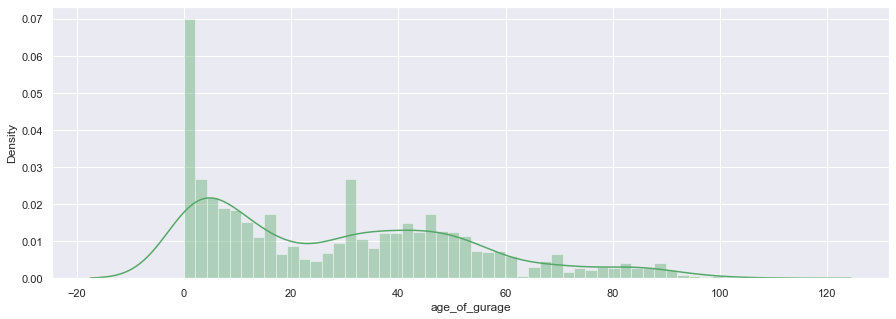

In [35]:
sns.distplot(housing.age_of_gurage,bins=50,color="g")
plt.show()

In [36]:
print("Mean: ", housing.age_of_gurage.mean())
print("Median: ", housing.age_of_gurage.median())
print("Mode: ", housing.age_of_gurage.mode().values[0])

Mean:  29.306018854242204
Median:  28.0
Mode:  1.0


In [37]:
# Inputing age_of_gurage with mode
housing['age_of_gurage'] = housing['age_of_gurage'].fillna(housing.age_of_gurage.mode().values[0])

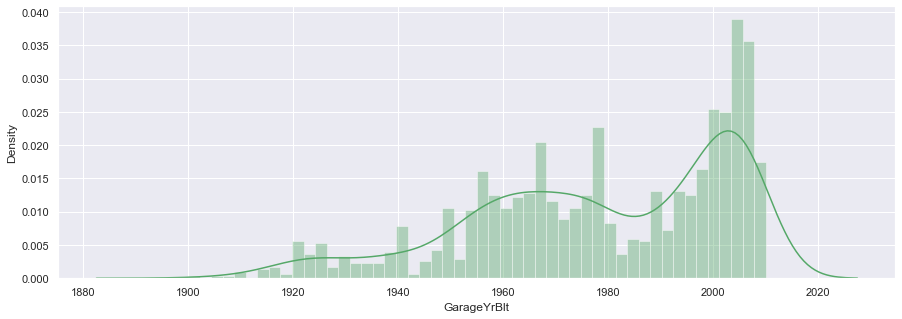

In [38]:
sns.distplot(housing.GarageYrBlt,bins=50,color="g")
plt.show()

In [39]:
print("Mean: ", housing.GarageYrBlt.mean())
print("Median: ", housing.GarageYrBlt.median())
print("Mode: ", housing.GarageYrBlt.mode().values[0])

Mean:  1978.5061638868744
Median:  1980.0
Mode:  2005.0


In [40]:
# Inputing age_of_gurage with mode
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing.GarageYrBlt.median())

In [41]:
# Checking again if anything left for Missing value inputation
print("% of null values in each column")
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ] )

% of null values in each column
Series([], dtype: float64)


## Create dummy variable from categorical variable

In [42]:
# We have two ordinal categorical variable ( OverallQual, OverallCond). 
#Creating dummy variable for OverallQualand OverallCond

label_encoder = preprocessing.LabelEncoder()
housing['OverallQual'] = label_encoder.fit_transform(housing['OverallQual'])
housing['OverallCond'] = label_encoder.fit_transform(housing['OverallCond'])

In [43]:
housing.shape

(1460, 73)

In [44]:
categorical_columns = housing.select_dtypes([np.object]).columns
housing_dummy_variables = pd.get_dummies(housing[categorical_columns])
housing=pd.concat([housing,housing_dummy_variables],axis=1)
housing= housing.drop(categorical_columns,axis=1)  

In [45]:
housing.shape

(1460, 289)

In [46]:
# Splitting in X and y
X = housing.drop('SalePrice',axis=1)
y = housing['SalePrice']

In [47]:
#  A Routine to calculate VIF and drop column based on given threshold for a data set ( Time consuming process )
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [48]:
# Dropping variable having VIF > 5. This will take around 15 minutes for 280 variable with 1460 rows with 100% cpu 
X = calculate_vif(X)

dropping 'YearBuilt' at index: 4
dropping 'YearRemodAdd' at index: 4
dropping 'BsmtFinSF1' at index: 5
dropping 'MSSubClass_120' at index: 30
dropping 'MSSubClass_90' at index: 43
dropping 'MSZoning_C (all)' at index: 43
dropping 'Alley_Grvl' at index: 47
dropping 'LotShape_IR1' at index: 49
dropping 'LandContour_Bnk' at index: 52
dropping 'LotConfig_Corner' at index: 55
dropping 'LandSlope_Gtl' at index: 59
dropping 'Neighborhood_Blmngtn' at index: 61
dropping 'Condition1_Artery' at index: 85
dropping 'BldgType_1Fam' at index: 93
dropping 'HouseStyle_1.5Fin' at index: 97
dropping 'RoofStyle_Flat' at index: 104
dropping 'Exterior1st_AsbShng' at index: 109
dropping 'Exterior1st_CBlock' at index: 112
dropping 'Exterior2nd_AsbShng' at index: 122
dropping 'MasVnrType_BrkCmn' at index: 137
dropping 'ExterQual_Ex' at index: 140
dropping 'ExterCond_Ex' at index: 143
dropping 'Foundation_BrkTil' at index: 147
dropping 'BsmtQual_Ex' at index: 152
dropping 'BsmtQual_No Basement' at index: 154
dr

In [49]:
X.shape

(1460, 173)

In [50]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [51]:
variable_to_be_scaled_int = X_train.select_dtypes(np.int64).columns.to_list
variable_to_be_scaled_int

<bound method IndexOpsMixin.tolist of Index(['BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'],
      dtype='object')>

In [52]:
variable_to_be_scaled_float = X_train.select_dtypes(np.float64).columns.to_list
variable_to_be_scaled_float

<bound method IndexOpsMixin.tolist of Index(['MasVnrArea'], dtype='object')>

In [53]:
# Scalling 
variable_to_be_scaled = ['BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','MasVnrArea']
#variable_to_be_scaled = housing.select_dtypes(np.int64).columns.to_list
scalar = MinMaxScaler()
X_train[variable_to_be_scaled] = scalar.fit_transform(X_train[variable_to_be_scaled])
X_test[variable_to_be_scaled] = scalar.transform(X_test[variable_to_be_scaled])
X_train.head()

MasVnrArea  BsmtFinSF2  BsmtFullBath  BsmtHalfBath  HalfBath  \
890     0.000000    0.000000      0.000000           0.0       0.0   
420     0.125000    0.000000      0.666667           0.0       0.0   
1446    0.118125    0.000000      0.000000           0.0       0.0   
1315    0.000000    0.187246      0.000000           0.0       0.5   
384     0.000000    0.000000      0.333333           0.0       0.5   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_160  \
890     0.000000     0.000000            0.0          0.0               0   
420     0.000000     0.000000            0.0          0.0               0   
1446    0.304551     0.074570            0.0          0.0               0   
1315    0.326721     0.000000            0.0          0.0               0   
384     0.252042     0.441683            0.0          0.0               0   

      ...  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
890   ...             0               0               0               0   
420   ...             0               0               0               0   
1446  ...             0               0               0               0   
1315  ...             0               0               0               0   
384   ...             0               0               0               0   

      SaleType_Oth  SaleCondition_Abnorml  SaleCondition_AdjLand  \
890              0                      0                      0   
420              0                      0                      0   
1446             0                      0                      0   
1315             0                      0                      0   
384              0                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Partial  
890                      0                     0                      0  
420                      1                     0                      0  
1446                     0                     0                      0  
1315                     0                     0                      0  
384                      0                     0                      0  

[5 rows x 173 columns]

In [54]:
# Instantiate LinearRegression object
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

164961.29371465792
[ 1.08549562e+05  1.41860928e+04  2.11434178e+04  5.70487890e+03
  1.78565247e+04  4.76226489e+04  6.37710656e+04  5.24755614e+03
  1.02282013e+04  1.01401041e+04  6.22900319e+03 -2.79156396e+04
 -3.66038909e+04 -2.14327739e+04 -2.15202369e+03  7.85062385e+03
  4.81187766e+03 -9.50667260e+03  2.54440393e+04  2.91556784e+04
  3.28003997e+03  2.84627761e+03 -1.17666599e+04  6.01742401e+03
  3.39942955e+04  2.28931672e+03  6.33896737e+03  1.39766508e+04
  1.73833508e+04 -1.92795496e+04 -2.00130792e+04  1.50919942e+03
 -9.54953110e+03  1.54879808e+04 -2.16651254e+04 -1.11944394e+04
  1.48674784e+03  4.66370631e+03  3.25688608e+04 -2.03371698e+04
 -4.03236898e+02 -2.74963916e+04 -3.09185177e+04 -2.20831057e+04
  4.81974306e+04  1.53293776e+04  9.11870658e+04  6.80844442e+04
 -1.66928033e+04  3.33974960e+03 -1.38655847e+04  4.67975130e+03
  6.40675038e+04  2.36794376e+04  3.61268497e+04 -6.36259928e+03
  1.52244453e+04 -2.49972421e+04 -2.32308552e+04 -1.01397940e+04
 -1.54

In [56]:
# Calculating prediction, r2 score, 
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train :" ,r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test :" ,r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_score train : 0.7962195452107679
r2_score test : -9.881656647316939e+22
1258463607670.3901
2.995487822052815e+35
1286772604.979949
6.21470502500584e+32


###### In practice, R2 will be negative whenever  model’s predictions are worse than a constant function that always predicts the mean of the data.

### Ridge Regression

In [57]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Using RFE to find top 100 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=150)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]



# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
model_cv.best_params_["alpha"]

{'alpha': 9.0}


9.0

In [59]:
#Fitting Ridge model for suggested and printing coefficients which have been penalised
print("Suggested Alpha : " , model_cv.best_params_["alpha"])

alpha = model_cv.best_params_["alpha"]

ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)
print(ridge.intercept_)

Suggested Alpha :  9.0
[ 5.29294572e+04  9.83864624e+03  1.25306102e+04  5.99940884e+02
  2.26896570e+04  3.44674630e+04  3.15544985e+04  2.64285277e+03
  6.82239770e+03 -4.68946056e+03 -9.26414783e+03 -2.29121660e+04
 -5.53593887e+03 -8.92921464e+03  1.16951723e+04  7.98691593e+03
 -8.99908881e+03  4.38513124e+03  1.61723163e+04  2.73218596e+03
  3.26356738e+03  5.26724922e+03 -1.14587285e+03  6.48831267e+03
  9.36730428e+03  1.46582611e+04 -1.22573933e+04 -4.71077284e+03
 -5.82160403e+03  1.91972679e+03 -7.65136201e+03 -1.20659422e+04
  3.15007584e+03 -3.96414473e+03  2.49912624e+04 -2.03080498e+04
 -1.37725663e+04 -2.07218166e+04 -1.67647690e+04 -1.59337811e+04
  1.09397436e+04  8.78419888e+03  6.74198254e+04  5.16011202e+04
 -1.17276560e+04 -1.50668121e+04 -3.81178273e+03  2.94332217e+04
  1.31385142e+04  1.26814660e+04 -7.89988690e+03  9.95200138e+03
 -8.68197434e+03 -1.03149861e+04 -2.05613327e+03 -3.76087889e+03
 -5.19312957e+03 -1.02700374e+04 -2.98617449e+04 -2.82563583e+04
  

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train :" ,r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test :" ,r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_score train : 0.7633920384901599
r2_score test : 0.7414525848115794
1461192679902.4116
783750803394.3195
1494062044.8899915
1626039011.191534


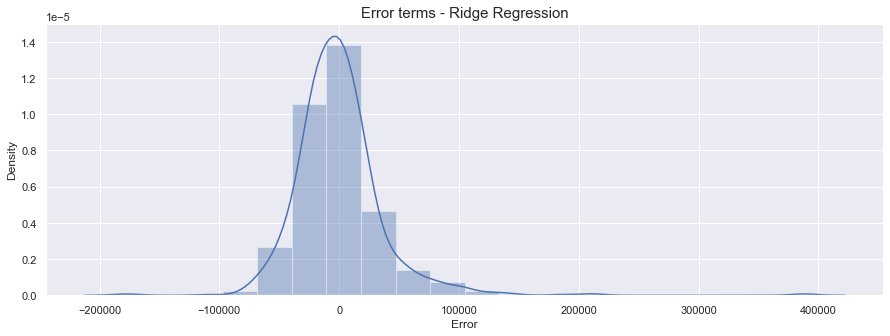

In [61]:
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title("Error terms - Ridge Regression", fontsize=15)
plt.xlabel("Error")
plt.show()

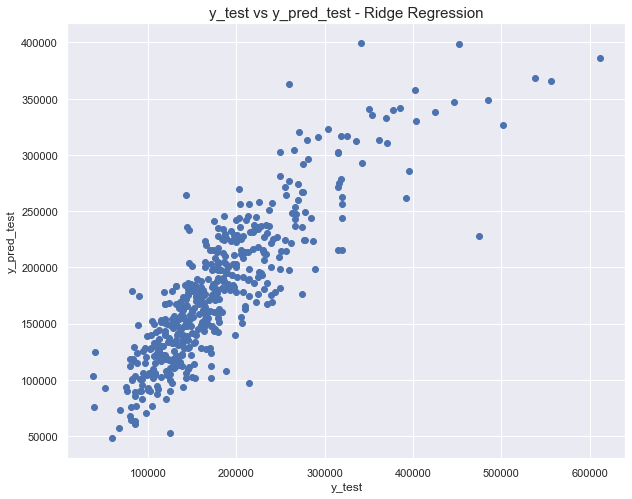

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_test)
plt.title("y_test vs y_pred_test - Ridge Regression", fontsize=15)
plt.xlabel("y_test")
plt.ylabel('y_pred_test')
plt.show()

### Lasso

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [65]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

#alpha = 100

print("Suggested Alpha : " , model_cv.best_params_["alpha"])

alpha = model_cv.best_params_["alpha"] 

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Suggested Alpha :  100


Lasso(alpha=100)

In [66]:
print(lasso.coef_)
print(lasso.intercept_)

[  84730.09685671    6232.29066032   12987.84376891       0.
   23637.41789591   42807.77136369   48804.26203027       0.
    4168.54294102      -0.              -0.          -26321.71411227
      -0.           -4550.55361105    7024.74428171    5039.69794519
   -7523.23175268       0.           25403.23404895       0.
       0.            2007.09482565       0.            2355.91902804
    6221.54388986   13619.36416977  -13028.37676588      -0.
      -0.               0.              -0.           -9529.80042919
    2440.63393375    2758.47433822   34735.03700838  -15497.35369009
    -811.21195561  -20649.94411139  -15616.47602869  -12496.72426377
   25542.71688534   12308.31546904   86932.58167168   66919.43584491
   -7751.24360279  -11611.02648878     526.20814173   57235.40233005
   22866.3467893    19841.69350814   -4358.75724905    8774.52210471
   -6125.96121799   -9210.24155869      -0.              -0.
      -0.           -7206.07316536  -44670.81273627  -36029.76086344
   32

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train :" ,r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test :" ,r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_score train : 0.775675727595701
r2_score test : 0.7375982926403913
1385333708426.2246
795434558126.4395
1416496634.3826427
1650279166.2374263


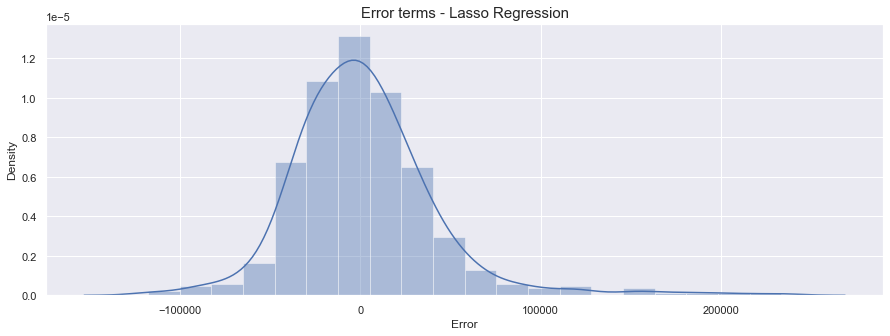

In [68]:
sns.distplot((y_test - y_pred_test), bins = 20)
plt.title("Error terms - Lasso Regression", fontsize=15)
plt.xlabel("Error")
plt.show()

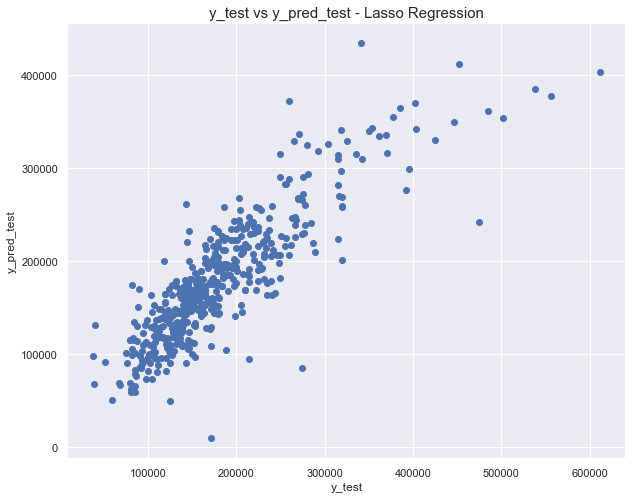

In [69]:
#
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_test)
plt.title("y_test vs y_pred_test - Lasso Regression",fontsize=15)
plt.xlabel("y_test")
plt.ylabel('y_pred_test')
plt.show()

#### Listing copariable view of coefficient for Ridge and Lasso Regression

In [70]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [71]:
betas.rows = X_train_rfe.columns

In [72]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Ridge',ascending=False)

Ridge          Lasso
Neighborhood_NoRidge      67419.825355   86932.581672
MasVnrArea                52929.457220   84730.096857
Neighborhood_NridgHt      51601.120217   66919.435845
BsmtExposure_Gd           39332.818993   40541.938930
WoodDeckSF                34467.462971   42807.771364
OpenPorchSF               31554.498508   48804.262030
Neighborhood_StoneBr      29433.221700   57235.402330
Neighborhood_Crawfor      24991.262374   34735.037008
HalfBath                  22689.656967   23637.417896
SaleCondition_Partial     21815.168802   21480.469959
Exterior2nd_ImStucc       20435.912186   33116.458594
Exterior1st_BrkFace       18831.002014   28393.065011
ExterQual_Gd              18795.888656   17534.827205
BsmtFinType1_GLQ          18629.582326   17403.330106
FireplaceQu_Gd            18330.136148   16401.275965
HouseStyle_2.5Fin         16479.136545   32217.579124
MSZoning_FV               16172.316294   25403.234049
Exterior1st_CemntBd       15793.483239   17576.932526
LotConfig_CulDSac         14658.261145   13619.364170
GarageQual_Gd             14639.472276   12296.915473
RoofStyle_Hip             14371.392356   10891.948395
FireplaceQu_TA            13403.990463   10297.094540
Neighborhood_Timber       13138.514248   22866.346789
Neighborhood_Veenker      12681.465970   19841.693508
BsmtFullBath              12530.610183   12987.843769
MSSubClass_60             11695.172301    7024.744282
Neighborhood_NPkVill      10939.743649   25542.716885
Exterior1st_Stone         10246.520781    3242.112982
Condition1_PosA            9952.001382    8774.522105
BsmtFinSF2                 9838.646237    6232.290660
LandContour_Low            9367.304280    6221.543890
BsmtFinType2_GLQ           8869.608952   13560.497251
RoofStyle_Mansard          8822.033212    5967.095796
Neighborhood_NWAmes        8784.198883   12308.315469
MasVnrType_Stone           8661.791821    7528.602635
SaleType_CWD               8469.079053    1961.851852
MSSubClass_70              7986.915933    5039.697945
SaleType_ConLD             7388.178501       0.000000
SaleCondition_Alloca       6935.175274     261.648753
ScreenPorch                6822.397697    4168.542941
GarageType_BuiltIn         6582.980161    1941.602788
LandContour_HLS            6488.312666    2355.919028
BsmtExposure_Mn            5675.891288    4354.930892
Exterior1st_Plywood        5399.567575    1280.959019
LotShape_IR2               5267.249216    2007.094826
Exterior1st_Stucco         5082.598859   11677.147696
HouseStyle_2.5Unf          4625.485987       0.000000
MSSubClass_85              4385.131244       0.000000
Foundation_Stone           4024.015459       0.000000
Functional_Mod             3733.218265       0.000000
Alley_Pave                 3263.567384       0.000000
Neighborhood_ClearCr       3150.075843    2440.633934
Exterior1st_WdShing        2803.661560    1279.266370
MSZoning_RH                2732.185957       0.000000
EnclosedPorch              2642.852770       0.000000
SaleType_ConLI             2603.470100       0.000000
SaleType_Con               2486.694452       0.000000
Foundation_Wood            2436.710118       0.000000
Fence_MnPrv                2204.697582    1768.903739
Exterior2nd_Stucco         2025.633486    1962.893035
RoofStyle_Shed             1935.528727       0.000000
Neighborhood_Blueste       1919.726793       0.000000
Fence_MnWw                 1082.702433       0.000000
PoolQC_Fa                   844.185880       0.000000
BsmtHalfBath                599.940884       0.000000
HeatingQC_Po                435.081956       0.000000
SaleCondition_AdjLand       295.793470      -0.000000
Exterior2nd_AsphShn         -42.681239       0.000000
Exterior2nd_BrkFace        -260.784814      -0.000000
Electrical_FuseP           -889.560254      -0.000000
LotShape_IR3              -1145.872854       0.000000
FireplaceQu_Fa            -1534.726750      -0.000000
Exterior1st_ImStucc       -1888.756255      -0.000000
Exterior2nd_CBlock        -1949.39102

## Conclusion

###### From above analysis ,we can see that Ridge is performing better based in r2 score. 

##### Ridge 
- r2_score : It is 0.7633920384901599 for train and 0.7414525848115794 for test data. 
- alpha : 9.0


##### Lasso
- r2_score : For Lasso r2 score is 0.775675727595701 for train  and 0.7375982926403913 for test data.
- alpha : 100


#### Significant Variables to predict the price of House in approximate order ( most impacting to least impacting )

1. MasVnrArea: Masonry veneer area in square feet
2. Neighborhood: Physical locations within Ames city limits
3. WoodDeckSF: Wood deck area in square feet
4. OpenPorchSF: Open porch area in square feet
5. BsmtExposure: Refers to walkout or garden level walls
6. MSSubClass: Identifies the type of dwelling involved in the sale
7. BldgType: Type of dwelling
8. HalfBath: Half baths above grade
9. Exterior2nd: Exterior covering on house (if more than one material)
10. SaleCondition: Condition of sale
11. BsmtFullBath: Basement full bathrooms
12. MSZoning: Identifies the general zoning classification of the sale
13. LotConfig: Lot configuration
14. HouseStyle: Style of dwelling
15. RoofStyle: Type of roof
16. Exterior1st: Exterior covering on house
17. ExterQual: Evaluates the quality of the material on the exterior
18. BsmtFinType1: Rating of basement finished area
19. FireplaceQu: Fireplace quality
20. GarageQual: Garage quality
21. Foundation: Type of foundation
22. BsmtQual: Evaluates the height of the basement
23. BsmtFinType2: Rating of basement finished area (if multiple types)
24. HeatingQC: Heating quality and condition
25. Electrical: Electrical system
26. GarageType: Garage location
27. GarageCond: Garage condition
28. PoolQC: Pool quality